In [1]:
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Using TensorFlow backend.


/home/kaiolae/code/word_models_keras_test/WorldModels


In [2]:

import analyze_rnn_predictions
%load_ext autoreload
%autoreload 2 #If we want to automatically load external modules as they are updated.

/home/kaiolae/code/word_models_keras_test/WorldModels


In [3]:
#To access gym
import sys
sys.path.append('/home/kaiolae/.virtualenvs/worldmodels/lib/python3.5/site-packages')
import os

In [4]:
import fnmatch
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir('../'):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append("../"+folder)
            else:
                all_models[num_mixtures] = ["../"+folder]
            
    return all_models
            
print(get_all_models())

{1: ['../trained_sequential_rnn_1mixtures_run10', '../trained_sequential_rnn_1mixtures_run5', '../trained_sequential_rnn_1mixtures_run2', '../trained_sequential_rnn_1mixtures_run7', '../trained_sequential_rnn_1mixtures_run11', '../trained_sequential_rnn_1mixtures_run13', '../trained_sequential_rnn_1mixtures_run9', '../trained_sequential_rnn_1mixtures_run1', '../trained_sequential_rnn_1mixtures_run14', '../trained_sequential_rnn_1mixtures_run6', '../trained_sequential_rnn_1mixtures_run3', '../trained_sequential_rnn_1mixtures_run12', '../trained_sequential_rnn_1mixtures_run8', '../trained_sequential_rnn_1mixtures_run4'], 2: ['../trained_sequential_rnn_2mixtures_run12', '../trained_sequential_rnn_2mixtures_run3', '../trained_sequential_rnn_2mixtures_run11', '../trained_sequential_rnn_2mixtures_run13', '../trained_sequential_rnn_2mixtures_run7', '../trained_sequential_rnn_2mixtures_run8', '../trained_sequential_rnn_2mixtures_run2', '../trained_sequential_rnn_2mixtures_run14', '../trained_s

In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    #fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [6]:
from collections import namedtuple

rnn_analyzers = {}
filename = "rnn_trained_model.h5"
for key, val in get_all_models().items():
    rnn_analyzers[key] = []
    for model in val:
        if filename not in os.listdir(model):
            print("Unfinished run. Skipping.")
            continue
        print("Loading model: ", model)
        new_analyzer = analyze_rnn_predictions.RNNAnalyzer(model+"/"+filename, key, 0.2) #TODO Note, I previously used temp=0.1 - Which Ha noted was so low that we got mode collapse.
        rnn_analyzers[key].append(new_analyzer)
print("rnn analyzers: ", rnn_analyzers)

Unfinished run. Skipping.
Unfinished run. Skipping.
Loading model:  ../trained_sequential_rnn_1mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   416         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Con

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_1mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_1mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 32)   416         conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_1mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_1mixtures_run8
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 32, 32, 32)   416         conv2d_41[0][0]                  
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_2mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_62 (Conv2D)              (None, 32, 32, 32)   416         conv2d_61[0][0]                  
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 16, 16, 32)   4128       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_2mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_82 (Conv2D)              (None, 32, 32, 32)   416         conv2d_81[0][0]                  
__________________________________________________________________________________________________
conv2d_83 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_8mixtures_run11
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_102 (Conv2D)             (None, 32, 32, 32)   416         conv2d_101[0][0]                 
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 16, 16, 32)   4128       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 1032)                 265224    
Total params: 594,952
Trainable params: 594,952
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_8mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_8mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_122 (Conv2D)             (None, 32, 32, 32)   416         conv2d_121[0][0]                 
__________________________________________________________________________________________________
conv2d_123 (Conv2D)             (None, 16, 16, 32)   4128        

Z_sample (Lambda)               (None, 64)           0           Z_mean[0][0]                     
                                                                 Z_var[0][0]                      
__________________________________________________________________________________________________
Decoder (Model)                 (None, 64, 64, 3)    1093219     Z_sample[0][0]                   
__________________________________________________________________________________________________
vae_layer_33 (VAELayer)         [(None, 64, 64, 3),  0           encoder_input[0][0]              
                                                                 Decoder[1][0]                    
Total params: 2,172,266
Trainable params: 2,172,266
Non-trainable params: 0
__________________________________________________________________________________________________
VAE init done
_________________________________________________________________
Layer (type)                 Output Shape           

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 1032)                 265224    
Total params: 594,952
Trainable params: 594,952
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_4mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_149 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_150 (Conv2D)             (None, 32, 32, 32)   416         conv2d_149[0][0]                 
__________________________________________________________________________________________________
conv2d_151 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 516)                  132612    
Total params: 462,340
Trainable params: 462,340
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_4mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_169 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_170 (Conv2D)             (None, 32, 32, 32)   416         conv2d_169[0][0]                 
__________________________________________________________________________________________________
conv2d_171 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 516)                  132612    
Total params: 462,340
Trainable params: 462,340
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_4mixtures_run14
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

rnn analyzers:  {1: [<analyze_rnn_predictions.RNNAnalyzer object at 0x7fe210fce898>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe2795baa58>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe20c145eb8>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe1cc624240>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe196715b00>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe195a6c898>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe195012f28>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe1946fd518>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe193b78a90>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe1931546d8>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe192715828>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe191cd1978>], 2: [<analyze_rnn_predictions.RNNAnalyzer object at 0x7fe193009ba8>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe19083fba8>, <analyze_rnn_predictions.RNNAnalyzer object at 0x7fe18fd46ba8>, <analyze_rnn_p

In [7]:
#Get a start video
#Getting data to feed into the VAE and RNN
import numpy as np
import os
# load preprocessed data
training_data = np.load(os.path.join("../rnn_data_64_dim", "rnn_training_data.npz"))
action_data = training_data['action']
observation_data = training_data['latent']

episode_num = 16
single_action_sequence = action_data[episode_num]
single_latent_sequence = observation_data[episode_num]
print("Actions length: ", len(single_action_sequence))
print("Latent vectors length: ", len(single_latent_sequence))
num_frames = len(single_latent_sequence)



#Decode all 100 vectors, store as video
#Visualize video.

Actions length:  177
Latent vectors length:  177


In [8]:
#Decode a sequence with the VAE and visualize it
def decode_and_visualize(latent_vector_sequence, rnn_analyzer):
    plot_movie_mp4(rnn_analyzer.decode_with_vae(latent_vector_sequence))

In [9]:
def calc_mixture_weights_and_events_dreaming(rnn_analyzer, dream_steps=100):
    #Analyzing a single model
    WARM_UP_STEPS = 100
    previous_z = single_latent_sequence[WARM_UP_STEPS]

    mixture_weight_history = []
    z_history = []
    rnn_analyzer._reset()
    rnn_analyzer.warm_up_lstm(single_action_sequence, single_latent_sequence)
    for i in range(dream_steps):
        previous_z, mixture_weights = rnn_analyzer.predict_one_step(0, previous_z)
        z_history.append(previous_z)
        mixture_weight_history.append(mixture_weights)
    return np.array(mixture_weight_history), np.array(z_history)

In [10]:
def visualize_mixture_weights_and_events(weights_sequence, z_sequence, rnn_analyzer):
    plt.plot(weights_sequence)
    plt.figure(figsize=(20,10))
    columns = 4
    counter = 0
    skip_image = 5
    decoded_images = rnn_analyzer.decode_with_vae(z_sequence)
    plot_counter = 0
    for d in decoded_images:
        if counter%skip_image == 0:
            if plot_counter%columns == 0:
                print("Timestep: ", counter)
            plt.subplot((len(z_sequence)//skip_image)//columns + 1, columns, plot_counter+1)
            plt.imshow(d)
            plot_counter+=1
        counter+=1

zs are  [[-0.24739423 -0.47015784  0.16177652 ...  1.26779808  0.48017275
   0.87756648]
 [-0.170774   -0.05138045  0.08072374 ...  1.01229415  0.48098206
   0.73742105]
 [-0.28137982 -0.38998461  0.14107792 ...  1.08671397  0.50665283
   0.83785126]
 ...
 [ 1.35090712 -0.57377521  0.08785192 ...  0.5359068   1.05841133
   0.68621935]
 [ 1.45356599 -0.51994053  0.03518792 ...  0.53970769  1.12548265
   0.75990826]
 [ 1.33691906 -0.45818374  0.05545991 ...  0.54093633  1.09918973
   0.60368747]]
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80


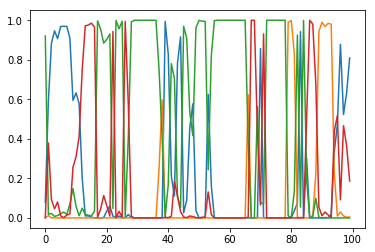

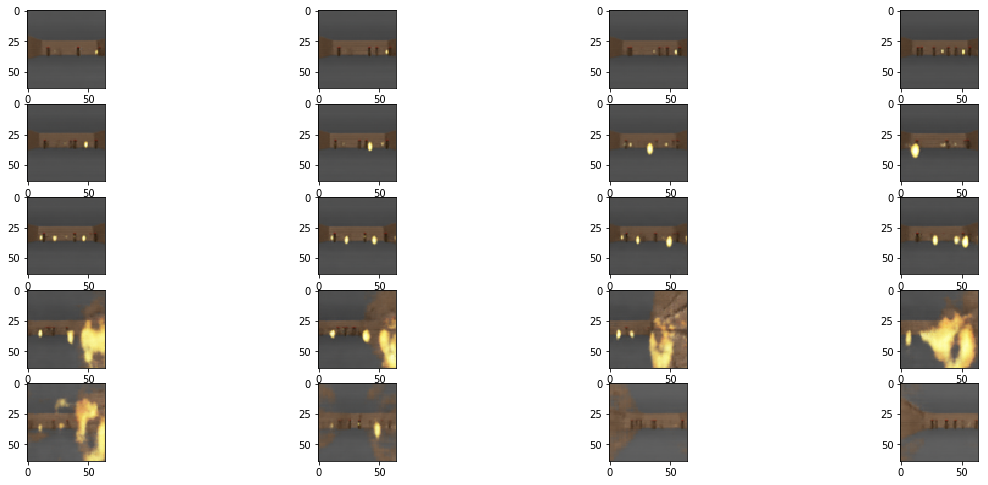

In [56]:
analyzer1= rnn_analyzers[4][7]
weights, zs = calc_mixture_weights_and_events_dreaming(analyzer1)
print("zs are ", zs)
visualize_mixture_weights_and_events(weights, zs, analyzer1)


In [64]:
new_analyzer = analyze_rnn_predictions.RNNAnalyzer("../trained_sequential_rnn_4mixtures_run9/rnn_trained_model.h5", 4, 0.01)
weights, zs = calc_mixture_weights_and_events_dreaming(new_analyzer)
decoded_images = new_analyzer.decode_with_vae(zs)
plot_movie_mp4(decoded_images)

VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_205 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_206 (Conv2D)             (None, 32, 32, 32)   416         conv2d_205[0][0]                 
__________________________________________________________________________________________________
conv2d_207 (Conv2D)             (None, 16, 16, 32)   4128        conv2d_206[0][0]                 
_______________________

<Figure size 64x64 with 0 Axes>

In [11]:
import count_monsters_and_balls
import numpy as np
import collections
FIREBALL_THRESHOLD = 0.5
WALL_THRESHOLD = 0.39

def count_appearances_of_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][1]

def name_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][0]

#This measures how often the same event is captured by the same mixture.
#However, that is not enough: We also need to make sure the handling of the event is
#unique to that mixture. That is, we have to measure if that mixture also handles other events.
def measure_dominating_mixture_for_events(analyzer, num_steps = 100):
    # Measuring the tendency for different events to be modelled by different gaussians
    weights, zs = calc_mixture_weights_and_events_dreaming(analyzer,num_steps)
    dominating_mixture_during_explosions = []
    dominating_mixture_during_fireball = []
    dominating_mixture_during_wall_left = []
    dominating_mixture_during_wall_right = []
    dominating_mixture_otherwise = []

    decoded_images = analyzer.decode_with_vae(zs)
    visualize_mixture_weights_and_events(weights, zs, analyzer)
    for img_counter in range(len(decoded_images)):
        img = decoded_images[img_counter]
        weight_vector = weights[img_counter]
        dominating_mixture = np.argmax(weight_vector)
        is_exploding = count_monsters_and_balls.is_there_a_big_explosion(img, FIREBALL_THRESHOLD)
        is_fireball, _ = count_monsters_and_balls.count_fireballs(img, FIREBALL_THRESHOLD)
        is_left_wall = count_monsters_and_balls.is_there_a_lefthand_wall(img, WALL_THRESHOLD)
        is_right_wall = count_monsters_and_balls.is_there_a_righthand_wall(img, WALL_THRESHOLD)

        no_events_seen = True
        if is_exploding:
            dominating_mixture_during_explosions.append(dominating_mixture)
            no_events_seen = False
        elif is_fireball:
            dominating_mixture_during_fireball.append(dominating_mixture)
            no_events_seen = False
        elif is_left_wall:
            dominating_mixture_during_wall_left.append(dominating_mixture)
            no_events_seen = False
        elif is_right_wall:
            dominating_mixture_during_wall_right.append(dominating_mixture)
            no_events_seen = False

        if no_events_seen:
            dominating_mixture_otherwise.append(dominating_mixture) #TODO Add walls

    results = {"explosion_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_explosions),
               "explosion_other" : len(dominating_mixture_during_explosions) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_explosions),
               "fireball_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball),
               "fireball_other" : len(dominating_mixture_during_fireball) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball),
               "left_wall_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_left),
               "left_wall_other" : len(dominating_mixture_during_wall_left) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_left),
               "right_wall_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_right),
               "right_wall_other" : len(dominating_mixture_during_wall_right) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_right),
               "otherwise_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_otherwise),
               "otherwise_other" : len(dominating_mixture_otherwise) - count_appearances_of_most_common_element_in_array(dominating_mixture_otherwise)}
    
    all_events_for_each_mixture = {}
    all_events = [dominating_mixture_during_explosions, dominating_mixture_during_fireball,
                 dominating_mixture_during_wall_left, dominating_mixture_during_wall_right,
                 dominating_mixture_otherwise]
    
    event_counter = 0
    for event in all_events:
        for mixture in event:
            if mixture in all_events_for_each_mixture.keys():
                all_events_for_each_mixture[mixture].append(event_counter)
            else:
                all_events_for_each_mixture[mixture] = [event_counter]
        event_counter +=1
        
    main_mixture_for_explosions = name_most_common_element_in_array(dominating_mixture_during_explosions)
    main_mixture_for_fireball = name_most_common_element_in_array(dominating_mixture_during_fireball)
    main_mixture_for_left_wall = name_most_common_element_in_array(dominating_mixture_during_wall_left)
    main_mixture_for_right_wall = name_most_common_element_in_array(dominating_mixture_during_wall_right)
    main_mixture_otherwise = name_most_common_element_in_array(dominating_mixture_otherwise)
    main_mixtures_for_events = {"explosion" : main_mixture_for_explosions,
                               "fireball" : main_mixture_for_fireball,
                               "left_wall" : main_mixture_for_left_wall,
                               "right_wall" : main_mixture_for_right_wall,
                               "otherwise" : main_mixture_otherwise}
    
    
    return results, all_events_for_each_mixture, main_mixtures_for_events
               

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from

In [12]:
event_to_mixture, mixture_to_event, main_mixture = measure_dominating_mixture_for_events(analyzer1, 100)
print(mixture_to_event)
print(event_to_mixture)
print(main_mixture)



NameError: name 'analyzer1' is not defined

In [21]:
explosion_event = 0
explosions_captured_by_main_gaussian = 0
explosions_captured_by_other_gaussian = 0
main_mixture_id = -1
max_num_explosion_events = 0
total_num_explosion_events = 0
for mixture_id, event_array in mixture_to_event.items():
    num_explosions = np.count_nonzero(np.array(event_id), explosion_event)
    total_num_explosion_events += num_explosions
    if num_explosions > max_num_explosion_events:
        max_num_explosion_events = num_explosions
        main_mixture_id = mixture_id

NameError: name 'event_id' is not defined

1
2
8
4
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 19), (1, 15), (3, 9)]
[(0, 19), (1, 15), (3, 9)]
[(0, 268), (2, 127), (3, 55), (1, 16)]
[(0, 268), (2, 127), (3, 55), (1, 16)]
[(0, 113), (3, 30), (2, 24)]
[(0, 113), (3, 30), (2, 24)]
[(2, 77), (0, 33), (3, 3)]
[(2, 77), (0, 33), (3, 3)]
[(0,

Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 155), (2, 153), (1, 6), (3, 3)]
[(0, 155), (2, 153), (1, 6), (3, 3)]
[(0, 234), (2, 118), (3, 67), (1, 35)]
[(0, 234), (2, 118), (3, 67), (1, 35)]
[(3, 7), (0, 5), (1, 3)]
[(3, 7), (0, 5), (1, 3)]
[(3, 3), (1, 2)]
[(3, 3), (1, 2)]
[(0, 174), (3, 19), 

Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 64), (2, 5)]
[(1, 64), (2, 5)]
[(0, 209), (1, 95), (2, 73), (3, 56)]
[(0, 209), (1, 95), (2, 73), (3, 56)]
[(3, 32), (0, 26)]
[(3, 32), (0, 26)]
[(3, 34), (0, 13)]
[(3, 34), (0, 13)]
[(0, 268), (3, 110), (1, 9), (2, 6)]
[(0, 268), (3, 110), (1, 9), (2, 6)]
[(1, 64), (2, 5)]
[(0, 209), (1, 95), (2, 73), (3, 56)]
[(3, 32), (0, 26)]
[(3, 34), (0, 13)]
[(0, 268), (3,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[]
[]
[(0, 293), (2, 92), (1, 55), (3, 48)]
[(0, 293), (2, 92), (1, 55), (3, 48)]
[(3, 3), (1, 1), (0, 1)]
[(3, 3), (1, 1), (0, 1)]
[(0, 4), (3, 1)]
[(0, 4), (3, 1)]
[(0, 452), (1, 23), (3, 22), (2, 5)]
[(0, 452), (1, 23), (3, 22), (2, 5)]
[]
[(0, 293), (2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 32), (2, 1)]
[(3, 32), (2, 1)]
[(2, 249), (3, 100), (1, 55), (0, 20)]
[(2, 249), (3, 100), (1, 55), (0, 20)]
[(2, 177), (3, 19), (1, 10)]
[(2, 177), (3, 19), (1, 10)]
[(2, 25), (3, 2)]
[(2, 25), (3, 2)]
[(2, 203), (1, 83), (3, 24)]
[(2, 203), (1, 83),

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 130), (2, 17), (3, 5)]
[(1, 130), (2, 17), (3, 5)]
[(3, 253), (1, 108), (0, 61), (2, 44)]
[(3, 253), (1, 108), (0, 61), (2, 44)]
[(3, 187), (1, 50), (0, 40)]
[(3, 187), (1, 50), (0, 40)]
[(3, 9), (1, 2)]
[(3, 9), (1, 2)]
[(3, 74), (1, 15), (0, 3), (2,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 226), (3, 218), (0, 8)]
[(1, 226), (3, 218), (0, 8)]
[(0, 238), (2, 51), (3, 38), (1, 26)]
[(0, 238), (2, 51), (3, 38), (1, 26)]
[(0, 113), (2, 16)]
[(0, 113), (2, 16)]
[(0, 11), (1, 8), (2, 3)]
[(0, 11), (1, 8), (2, 3)]
[(0, 42), (2, 2)]
[(0, 42), (2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 69), (0, 38), (3, 5), (2, 2)]
[(1, 69), (0, 38), (3, 5), (2, 2)]
[(2, 193), (1, 73), (3, 48), (0, 35)]
[(2, 193), (1, 73), (3, 48), (0, 35)]
[(2, 42), (1, 22), (0, 12), (3, 2)]
[(2, 42), (1, 22), (0, 12), (3, 2)]
[(2, 48), (1, 13), (0, 1)]
[(2, 48), (

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 75), (1, 72), (3, 42), (2, 3)]
[(0, 75), (1, 72), (3, 42), (2, 3)]
[(0, 264), (1, 148), (3, 136), (2, 37)]
[(0, 264), (1, 148), (3, 136), (2, 37)]
[(0, 96), (2, 24), (3, 6), (1, 1)]
[(0, 96), (2, 24), (3, 6), (1, 1)]
[(0, 18), (2, 6), (3, 1)]
[(0, 18)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 64), (0, 4), (3, 2), (1, 1)]
[(2, 64), (0, 4), (3, 2), (1, 1)]
[(3, 347), (1, 74), (2, 63), (0, 54)]
[(3, 347), (1, 74), (2, 63), (0, 54)]
[(3, 3), (2, 1)]
[(3, 3), (2, 1)]
[(3, 11), (2, 1)]
[(3, 11), (2, 1)]
[(3, 267), (2, 83), (1, 23), (0, 2)]
[(3, 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 81), (2, 10), (0, 2)]
[(1, 81), (2, 10), (0, 2)]
[(0, 193), (1, 185), (3, 101), (2, 55)]
[(0, 193), (1, 185), (3, 101), (2, 55)]
[(3, 2), (0, 1)]
[(3, 2), (0, 1)]
[(0, 50), (3, 19), (1, 19)]
[(0, 50), (3, 19), (1, 19)]
[(0, 154), (3, 101), (1, 27)]
[(

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 261), (3, 27)]
[(0, 261), (3, 27)]
[(2, 184), (0, 176), (3, 126), (1, 20)]
[(2, 184), (0, 176), (3, 126), (1, 20)]
[(2, 75), (3, 19), (1, 10), (0, 2)]
[(2, 75), (3, 19), (1, 10), (0, 2)]
[(2, 20), (3, 3), (1, 1)]
[(2, 20), (3, 3), (1, 1)]
[(2, 53), (3

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 33), (2, 9), (1, 2)]
[(3, 33), (2, 9), (1, 2)]
[(1, 194), (3, 50), (2, 47), (0, 46)]
[(1, 194), (3, 50), (2, 47), (0, 46)]
[(1, 116), (2, 31), (0, 4)]
[(1, 116), (2, 31), (0, 4)]
[(1, 26), (0, 2)]
[(1, 26), (0, 2)]
[(1, 324), (2, 95), (0, 21)]
[(1, 32

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 131), (1, 10), (2, 3), (0, 2)]
[(3, 131), (1, 10), (2, 3), (0, 2)]
[(2, 257), (3, 200), (1, 116), (0, 19)]
[(2, 257), (3, 200), (1, 116), (0, 19)]
[(2, 92), (3, 19), (0, 7)]
[(2, 92), (3, 19), (0, 7)]
[(2, 1)]
[(2, 1)]
[(2, 131), (3, 11), (1, 1)]
[(2,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 147), (1, 41), (2, 3)]
[(3, 147), (1, 41), (2, 3)]
[(2, 196), (1, 57), (0, 39), (3, 27)]
[(2, 196), (1, 57), (0, 39), (3, 27)]
[(2, 30), (0, 3), (3, 2)]
[(2, 30), (0, 3), (3, 2)]
[]
[]
[(2, 338), (0, 54), (3, 50), (1, 13)]
[(2, 338), (0, 54), (3, 50),

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 108), (0, 107), (3, 7)]
[(2, 108), (0, 107), (3, 7)]
[(0, 206), (2, 86), (3, 55), (1, 29)]
[(0, 206), (2, 86), (3, 55), (1, 29)]
[(0, 45), (3, 13), (2, 1)]
[(0, 45), (3, 13), (2, 1)]
[(3, 4), (1, 4), (0, 2)]
[(3, 4), (1, 4), (0, 2)]
[(0, 277), (3, 30)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 67), (1, 6), (0, 3), (2, 3)]
[(3, 67), (1, 6), (0, 3), (2, 3)]
[(2, 314), (1, 131), (3, 101), (0, 14)]
[(2, 314), (1, 131), (3, 101), (0, 14)]
[(2, 129), (1, 37), (3, 12)]
[(2, 129), (1, 37), (3, 12)]
[]
[]
[(2, 127), (3, 33), (1, 23)]
[(2, 127), (3, 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 90), (2, 45), (0, 8), (3, 3)]
[(1, 90), (2, 45), (0, 8), (3, 3)]
[(3, 257), (1, 163), (2, 155), (0, 105)]
[(3, 257), (1, 163), (2, 155), (0, 105)]
[(3, 62), (1, 38), (0, 7)]
[(3, 62), (1, 38), (0, 7)]
[(3, 2), (1, 1)]
[(3, 2), (1, 1)]
[(3, 50), (0, 10

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 245), (1, 217), (0, 6), (2, 4)]
[(3, 245), (1, 217), (0, 6), (2, 4)]
[(0, 182), (3, 82), (1, 32), (2, 17)]
[(0, 182), (3, 82), (1, 32), (2, 17)]
[(0, 110), (1, 8), (2, 1)]
[(0, 110), (1, 8), (2, 1)]
[(0, 4)]
[(0, 4)]
[(0, 88), (1, 3), (2, 1)]
[(0, 88)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 12), (1, 11), (2, 3)]
[(0, 12), (1, 11), (2, 3)]
[(2, 299), (1, 67), (0, 43), (3, 19)]
[(2, 299), (1, 67), (0, 43), (3, 19)]
[(2, 116), (0, 18), (1, 13)]
[(2, 116), (0, 18), (1, 13)]
[]
[]
[(2, 346), (0, 46), (1, 7)]
[(2, 346), (0, 46), (1, 7)]
[(0, 1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 169), (1, 61), (3, 49), (2, 1)]
[(0, 169), (1, 61), (3, 49), (2, 1)]
[(0, 182), (1, 140), (3, 104), (2, 42)]
[(0, 182), (1, 140), (3, 104), (2, 42)]
[(2, 9)]
[(2, 9)]
[(3, 17), (0, 9), (2, 8)]
[(3, 17), (0, 9), (2, 8)]
[(0, 113), (3, 48), (2, 39), (1,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 162), (0, 13), (1, 1), (3, 1)]
[(2, 162), (0, 13), (1, 1), (3, 1)]
[(3, 261), (0, 51), (2, 49), (1, 40)]
[(3, 261), (0, 51), (2, 49), (1, 40)]
[]
[]
[]
[]
[(3, 348), (2, 47), (1, 27)]
[(3, 348), (2, 47), (1, 27)]
[(2, 162), (0, 13), (1, 1), (3, 1)]
[(

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 75), (2, 24), (0, 1), (3, 1)]
[(1, 75), (2, 24), (0, 1), (3, 1)]
[(0, 281), (1, 150), (3, 107), (2, 53)]
[(0, 281), (1, 150), (3, 107), (2, 53)]
[(3, 55), (1, 14), (0, 13)]
[(3, 55), (1, 14), (0, 13)]
[(3, 1)]
[(3, 1)]
[(0, 120), (3, 75), (1, 30)]
[(0

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 7), (3, 2), (1, 1)]
[(0, 7), (3, 2), (1, 1)]
[(2, 383), (3, 182), (0, 111), (1, 67)]
[(2, 383), (3, 182), (0, 111), (1, 67)]
[(2, 78), (3, 30), (1, 4)]
[(2, 78), (3, 30), (1, 4)]
[(2, 37), (3, 17), (1, 10)]
[(2, 37), (3, 17), (1, 10)]
[(2, 51), (3, 13

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 49), (2, 4)]
[(3, 49), (2, 4)]
[(1, 250), (2, 68), (0, 60), (3, 19)]
[(1, 250), (2, 68), (0, 60), (3, 19)]
[(1, 40), (2, 12), (0, 5)]
[(1, 40), (2, 12), (0, 5)]
[(1, 45), (2, 17), (0, 2)]
[(1, 45), (2, 17), (0, 2)]
[(1, 324), (2, 89), (0, 16)]
[(1, 32

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 106), (1, 9), (0, 2)]
[(3, 106), (1, 9), (0, 2)]
[(2, 335), (3, 149), (1, 120), (0, 44)]
[(2, 335), (3, 149), (1, 120), (0, 44)]
[(2, 111), (3, 11), (0, 2)]
[(2, 111), (3, 11), (0, 2)]
[(2, 17), (3, 3)]
[(2, 17), (3, 3)]
[(2, 77), (0, 10), (3, 3), (1,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 126), (1, 71), (2, 7)]
[(3, 126), (1, 71), (2, 7)]
[(2, 256), (1, 173), (0, 83), (3, 54)]
[(2, 256), (1, 173), (0, 83), (3, 54)]
[(2, 54), (3, 14), (1, 3), (0, 1)]
[(2, 54), (3, 14), (1, 3), (0, 1)]
[(2, 13), (0, 12), (3, 4), (1, 1)]
[(2, 13), (0, 12)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 105), (0, 72), (1, 6), (3, 1)]
[(2, 105), (0, 72), (1, 6), (3, 1)]
[(0, 354), (2, 125), (1, 72), (3, 69)]
[(0, 354), (2, 125), (1, 72), (3, 69)]
[(0, 47), (3, 14), (1, 4)]
[(0, 47), (3, 14), (1, 4)]
[]
[]
[(0, 92), (3, 30), (1, 7), (2, 2)]
[(0, 92), (

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 27), (1, 2), (0, 1)]
[(3, 27), (1, 2), (0, 1)]
[(3, 294), (2, 239), (1, 47), (0, 18)]
[(3, 294), (2, 239), (1, 47), (0, 18)]
[(2, 180), (1, 37), (3, 21)]
[(2, 180), (1, 37), (3, 21)]
[]
[]
[(2, 84), (3, 25), (1, 20), (0, 5)]
[(2, 84), (3, 25), (1, 20)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 31), (2, 17), (0, 10)]
[(1, 31), (2, 17), (0, 10)]
[(3, 306), (0, 159), (1, 126), (2, 104)]
[(3, 306), (0, 159), (1, 126), (2, 104)]
[(3, 41), (1, 13), (0, 3)]
[(3, 41), (1, 13), (0, 3)]
[(3, 29), (0, 13), (1, 8)]
[(3, 29), (0, 13), (1, 8)]
[(3, 109),

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 67), (3, 12)]
[(1, 67), (3, 12)]
[(0, 233), (3, 79), (1, 70), (2, 32)]
[(0, 233), (3, 79), (1, 70), (2, 32)]
[(0, 98), (1, 4), (2, 3)]
[(0, 98), (1, 4), (2, 3)]
[(0, 10), (2, 4)]
[(0, 10), (2, 4)]
[(0, 323), (2, 34), (1, 31)]
[(0, 323), (2, 34), (1, 3

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 49), (0, 28), (3, 4), (2, 1)]
[(1, 49), (0, 28), (3, 4), (2, 1)]
[(2, 189), (1, 89), (0, 52), (3, 32)]
[(2, 189), (1, 89), (0, 52), (3, 32)]
[(2, 53), (0, 15), (1, 12)]
[(2, 53), (0, 15), (1, 12)]
[(0, 5), (2, 4), (1, 3)]
[(0, 5), (2, 4), (1, 3)]
[(2,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 144), (3, 54), (1, 49)]
[(0, 144), (3, 54), (1, 49)]
[(0, 292), (3, 110), (2, 80), (1, 65)]
[(0, 292), (3, 110), (2, 80), (1, 65)]
[(0, 95), (2, 9), (3, 3)]
[(0, 95), (2, 9), (3, 3)]
[(0, 12)]
[(0, 12)]
[(0, 52), (2, 26), (3, 9)]
[(0, 52), (2, 26), (3

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 182), (0, 21)]
[(2, 182), (0, 21)]
[(3, 253), (1, 77), (2, 74), (0, 51)]
[(3, 253), (1, 77), (2, 74), (0, 51)]
[(3, 8)]
[(3, 8)]
[(3, 35), (1, 12), (2, 2)]
[(3, 35), (1, 12), (2, 2)]
[(3, 209), (2, 62), (1, 12), (0, 2)]
[(3, 209), (2, 62), (1, 12), (0

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 300), (2, 36), (0, 5), (3, 3)]
[(1, 300), (2, 36), (0, 5), (3, 3)]
[(0, 178), (1, 114), (2, 97), (3, 82)]
[(0, 178), (1, 114), (2, 97), (3, 82)]
[(3, 24), (2, 4), (0, 2)]
[(3, 24), (2, 4), (0, 2)]
[(3, 1), (0, 1)]
[(3, 1), (0, 1)]
[(0, 110), (3, 39), 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 3)]
[(3, 3)]
[(2, 389), (3, 78), (0, 71), (1, 54)]
[(2, 389), (3, 78), (0, 71), (1, 54)]
[(2, 50), (3, 9), (1, 5)]
[(2, 50), (3, 9), (1, 5)]
[(2, 6), (1, 1)]
[(2, 6), (1, 1)]
[(2, 267), (3, 41), (1, 23), (0, 3)]
[(2, 267), (3, 41), (1, 23), (0, 3)]
[(

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 86), (2, 4), (0, 1)]
[(3, 86), (2, 4), (0, 1)]
[(1, 339), (2, 43), (3, 29), (0, 27)]
[(1, 339), (2, 43), (3, 29), (0, 27)]
[(1, 135), (2, 48), (0, 13)]
[(1, 135), (2, 48), (0, 13)]
[]
[]
[(1, 244), (2, 27), (0, 4)]
[(1, 244), (2, 27), (0, 4)]
[(3, 86)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 8)]
[(3, 8)]
[(2, 374), (3, 132), (0, 54), (1, 10)]
[(2, 374), (3, 132), (0, 54), (1, 10)]
[(2, 168), (0, 33), (3, 10)]
[(2, 168), (0, 33), (3, 10)]
[(0, 5), (3, 4)]
[(0, 5), (3, 4)]
[(2, 154), (3, 27), (0, 21)]
[(2, 154), (3, 27), (0, 21)]
[(3, 8)]
[

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 90), (3, 90), (2, 9)]
[(1, 90), (3, 90), (2, 9)]
[(2, 339), (1, 90), (3, 78), (0, 59)]
[(2, 339), (1, 90), (3, 78), (0, 59)]
[(2, 52), (3, 9), (0, 3), (1, 1)]
[(2, 52), (3, 9), (0, 3), (1, 1)]
[(3, 2)]
[(3, 2)]
[(2, 142), (3, 20), (0, 12), (1, 4)]
[(2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 274), (0, 37), (3, 14), (1, 2)]
[(2, 274), (0, 37), (3, 14), (1, 2)]
[(2, 252), (0, 152), (3, 75), (1, 23)]
[(2, 252), (0, 152), (3, 75), (1, 23)]
[(0, 2), (2, 1)]
[(0, 2), (2, 1)]
[]
[]
[(0, 140), (1, 14), (2, 8), (3, 6)]
[(0, 140), (1, 14), (2, 8), 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[]
[]
[(2, 305), (1, 77), (3, 44), (0, 15)]
[(2, 305), (1, 77), (3, 44), (0, 15)]
[(2, 259), (3, 45), (1, 24)]
[(2, 259), (3, 45), (1, 24)]
[(2, 100), (3, 13), (1, 10)]
[(2, 100), (3, 13), (1, 10)]
[(2, 93), (1, 11), (3, 4)]
[(2, 93), (1, 11), (3, 4)]
[]
[

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 138), (2, 30), (0, 5), (3, 3)]
[(1, 138), (2, 30), (0, 5), (3, 3)]
[(3, 252), (0, 120), (2, 81), (1, 80)]
[(3, 252), (0, 120), (2, 81), (1, 80)]
[(3, 26), (0, 17), (1, 6)]
[(3, 26), (0, 17), (1, 6)]
[(3, 12), (1, 5), (0, 1)]
[(3, 12), (1, 5), (0, 1)]


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 11)]
[(3, 11)]
[(0, 354), (1, 40), (2, 30), (3, 22)]
[(0, 354), (1, 40), (2, 30), (3, 22)]
[(0, 1), (2, 1)]
[(0, 1), (2, 1)]
[]
[]
[(0, 432), (1, 60), (2, 49)]
[(0, 432), (1, 60), (2, 49)]
[(3, 11)]
[(0, 354), (1, 40), (2, 30), (3, 22)]
[(0, 1), (2, 1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 37), (0, 5), (3, 5)]
[(1, 37), (0, 5), (3, 5)]
[(2, 298), (1, 97), (0, 38), (3, 23)]
[(2, 298), (1, 97), (0, 38), (3, 23)]
[(2, 17), (1, 14), (0, 12)]
[(2, 17), (1, 14), (0, 12)]
[]
[]
[(2, 329), (0, 87), (1, 38)]
[(2, 329), (0, 87), (1, 38)]
[(1, 37)

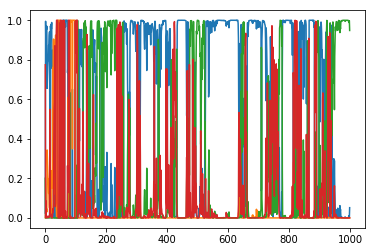

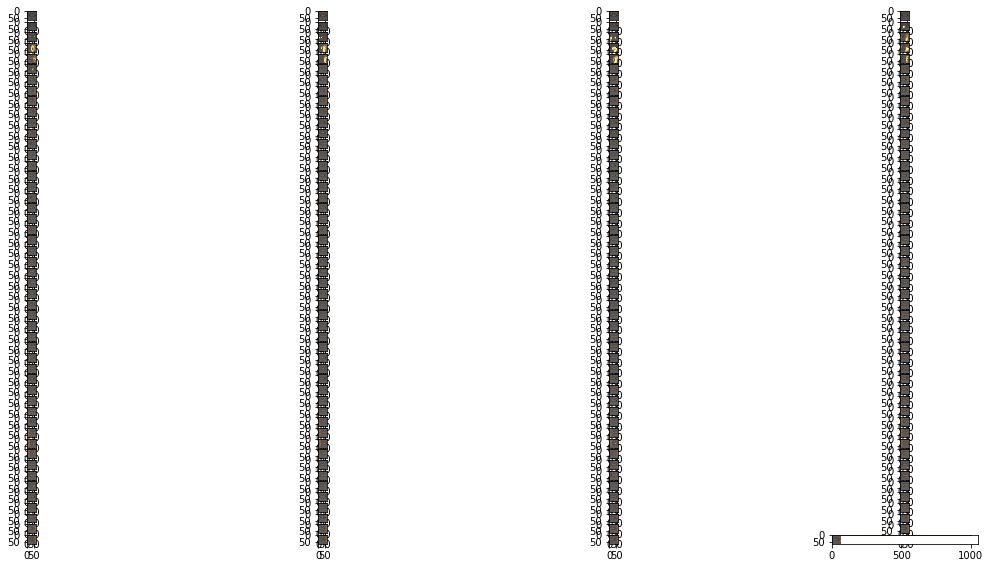

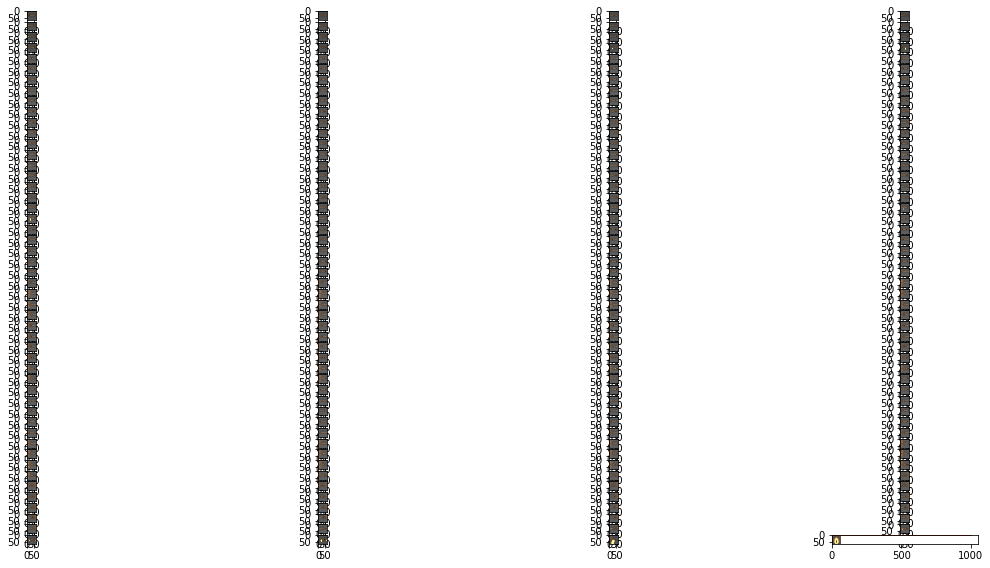

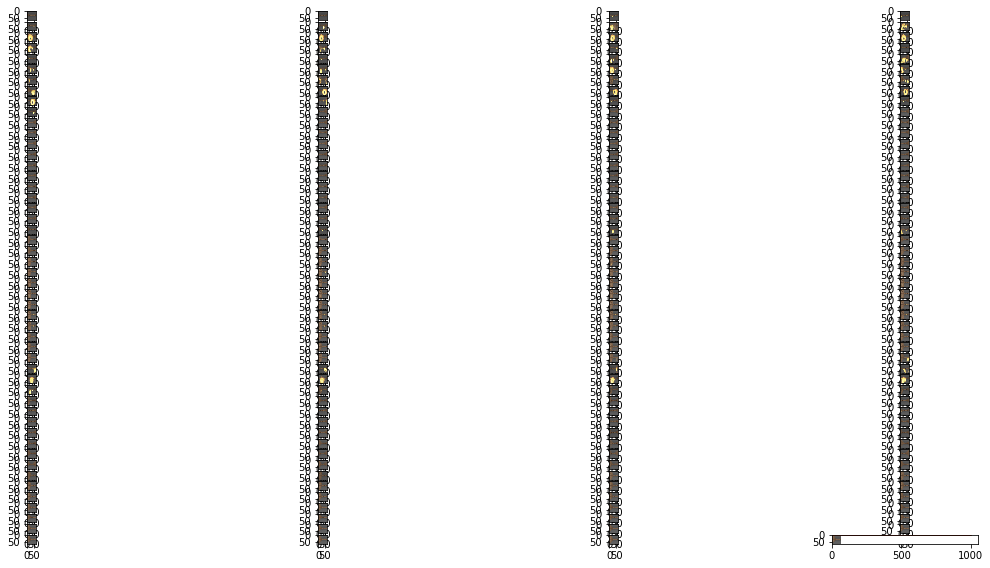

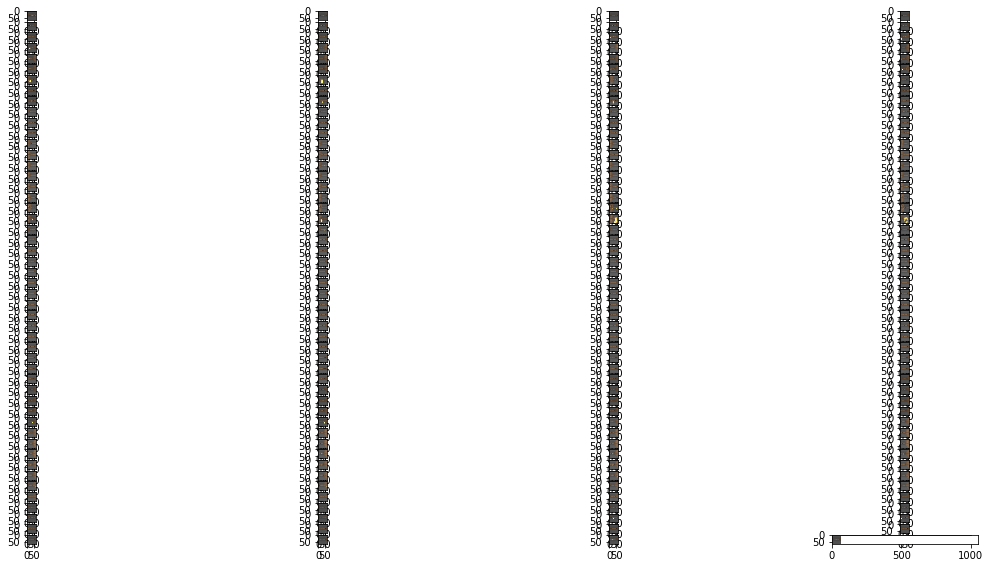

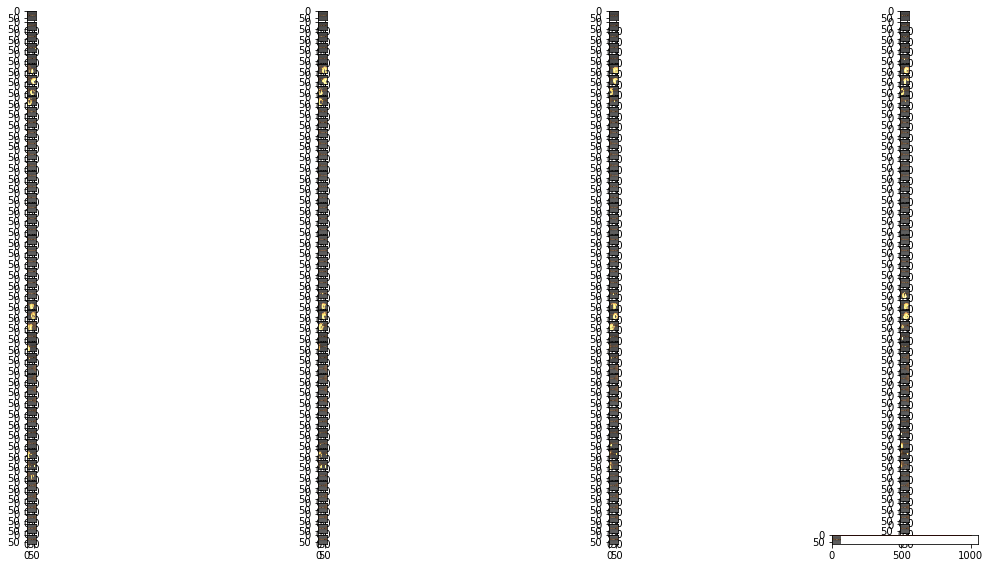

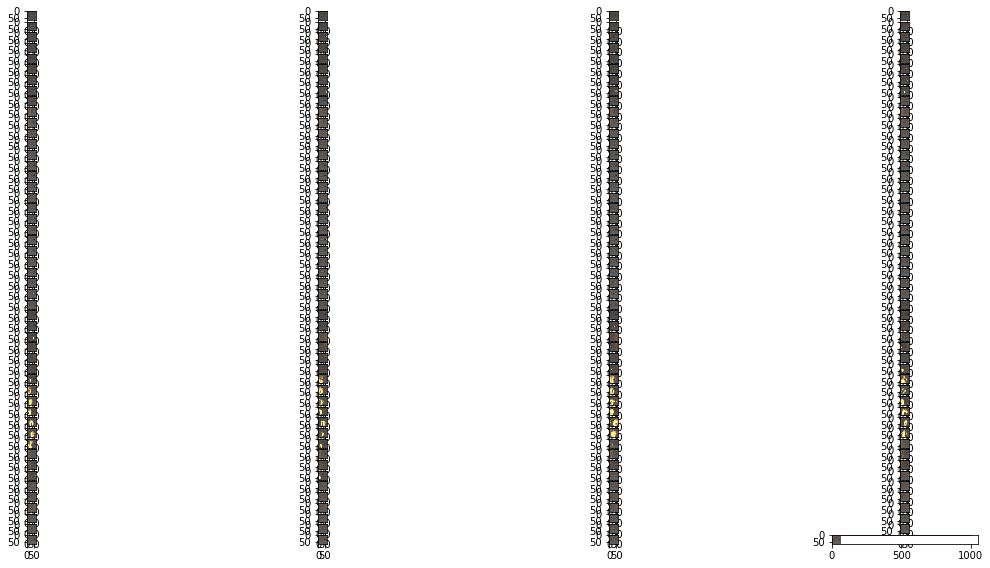

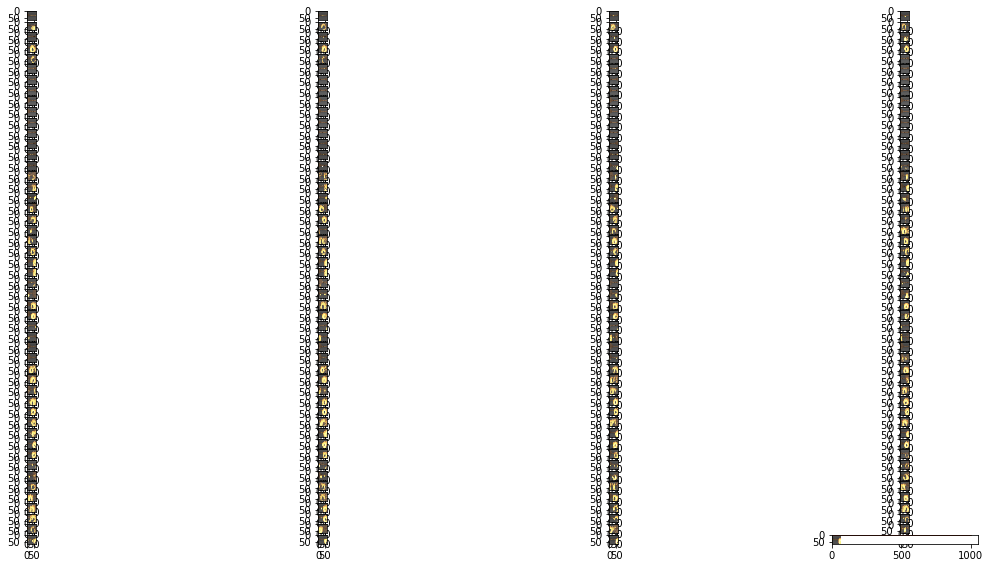

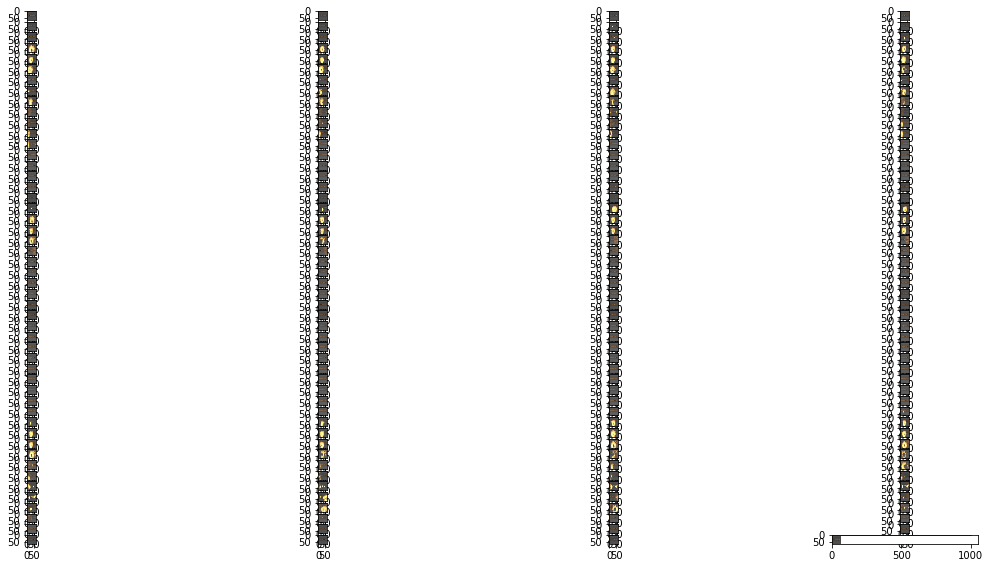

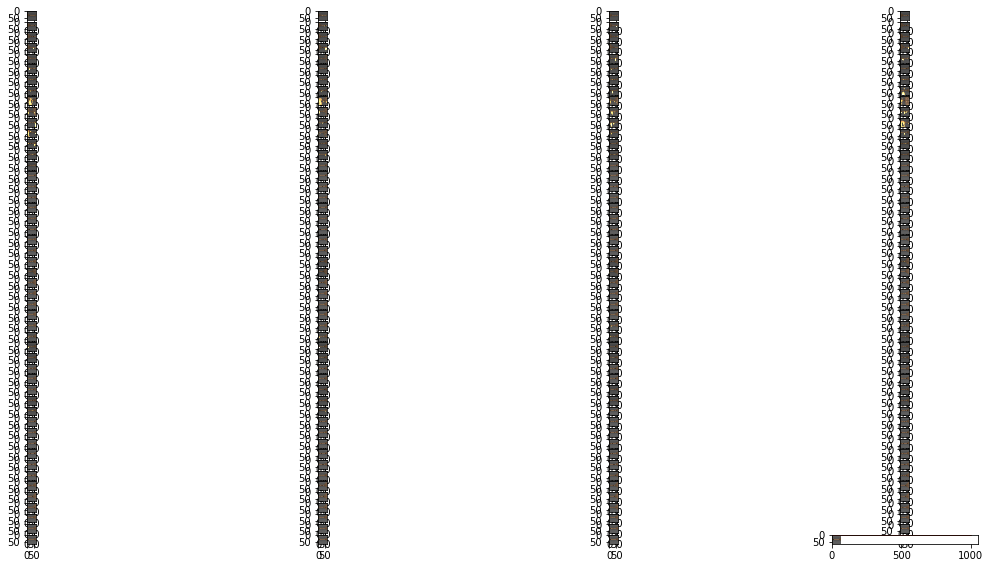

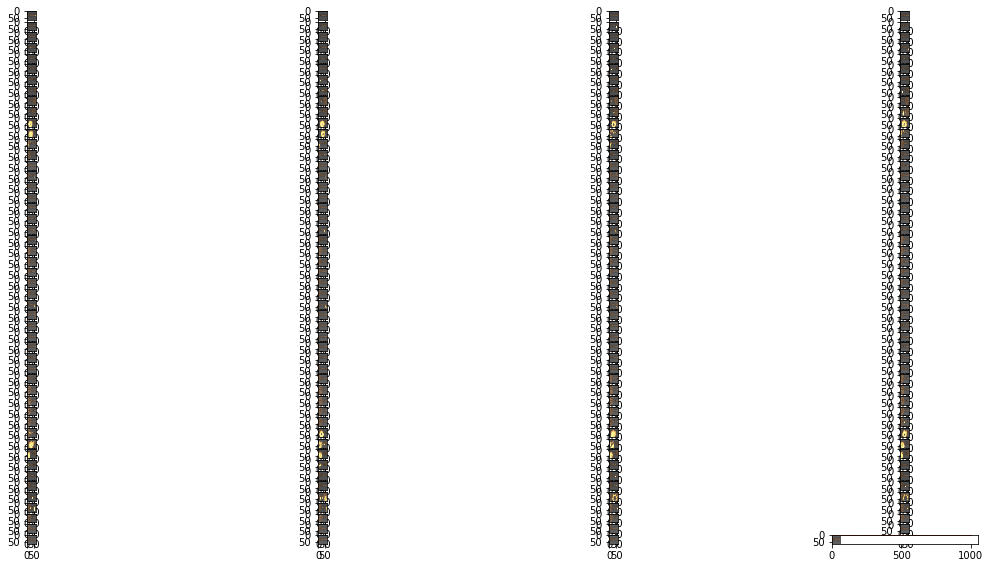

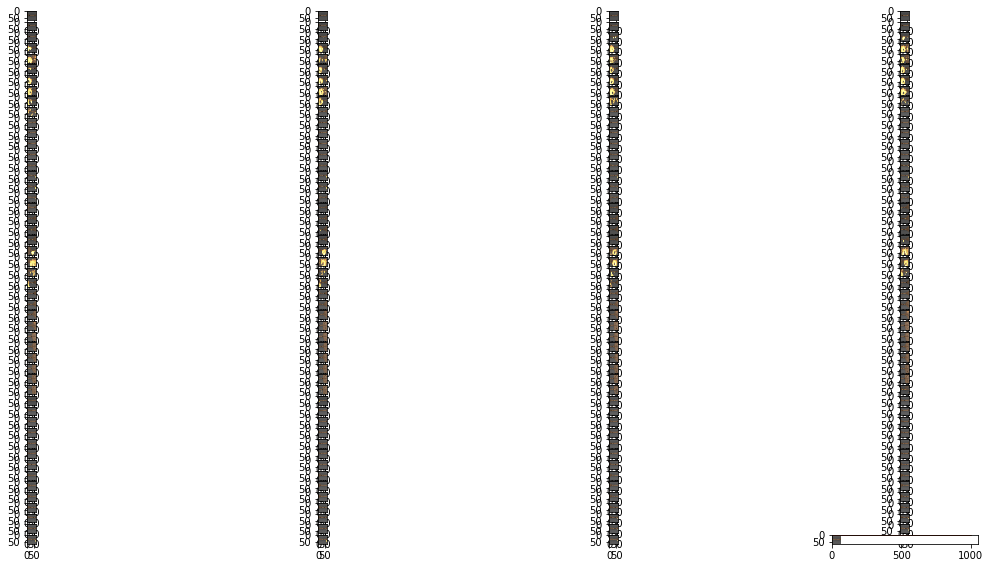

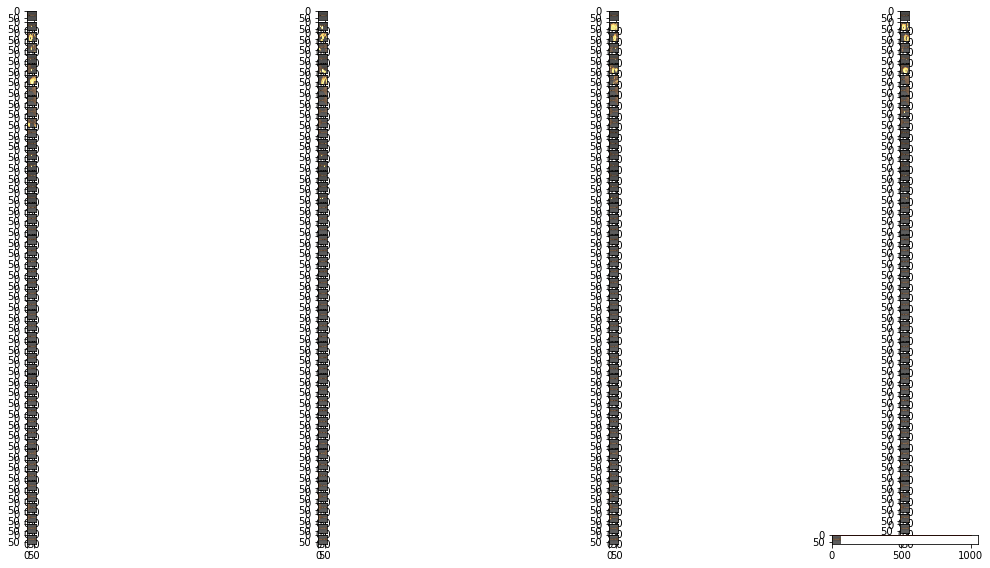

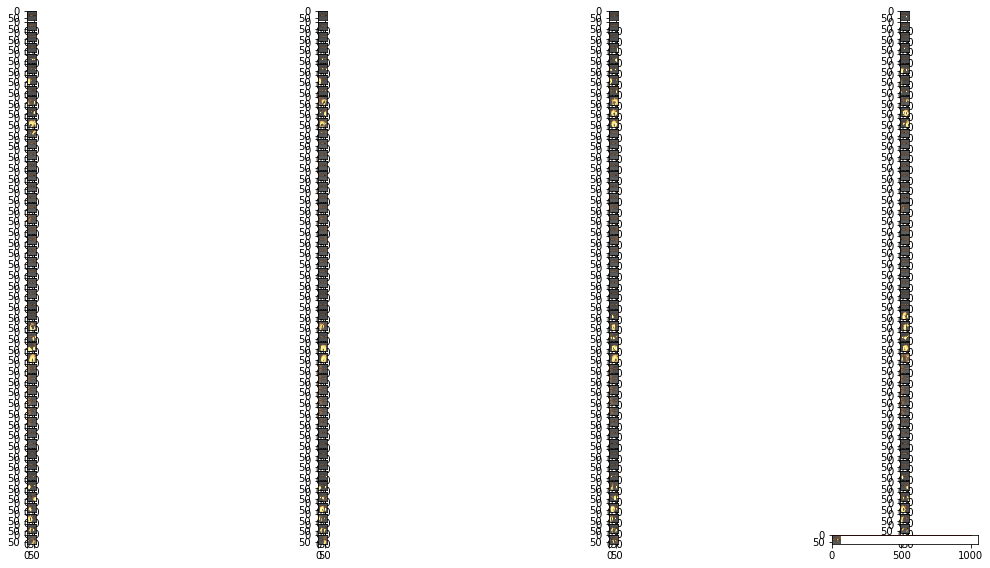

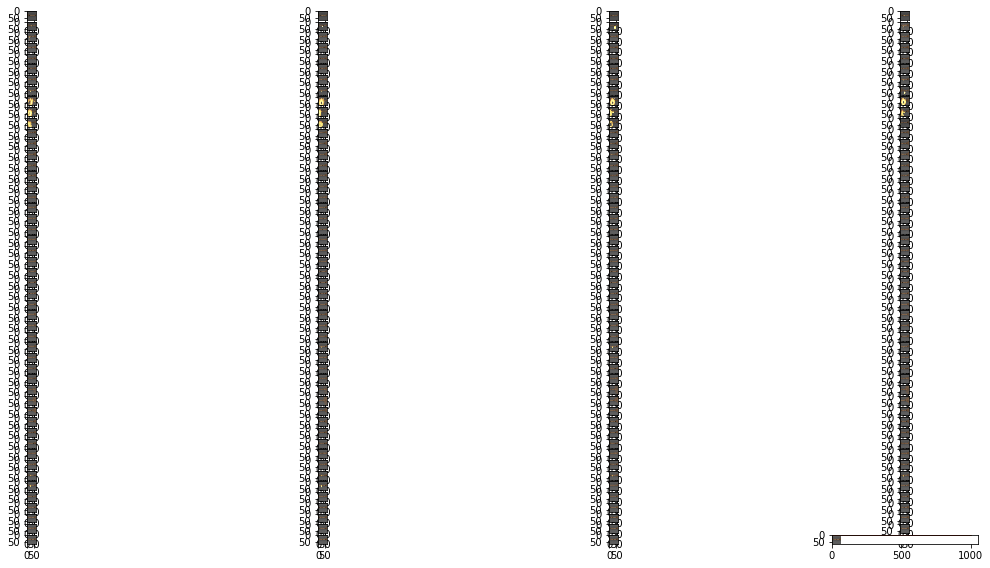

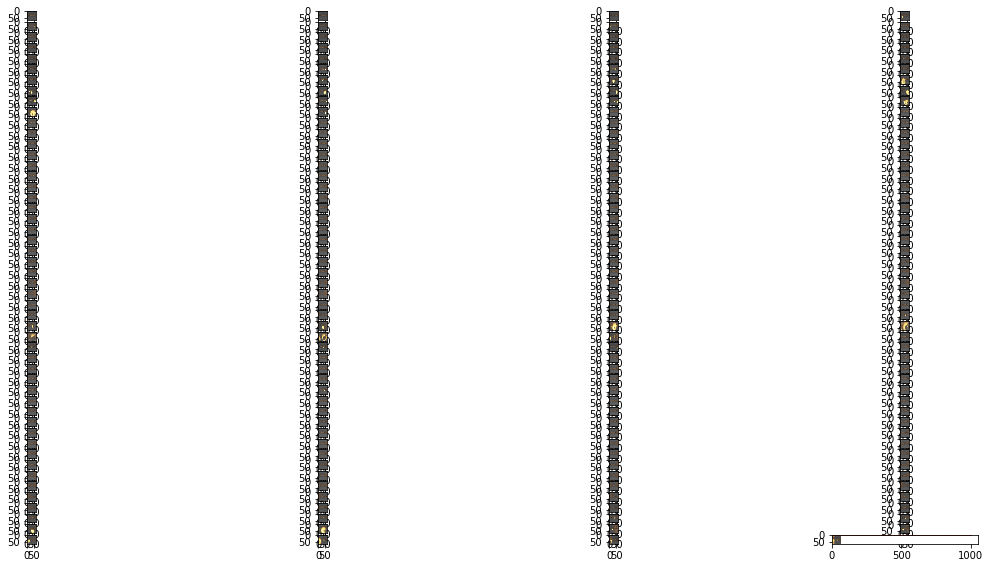

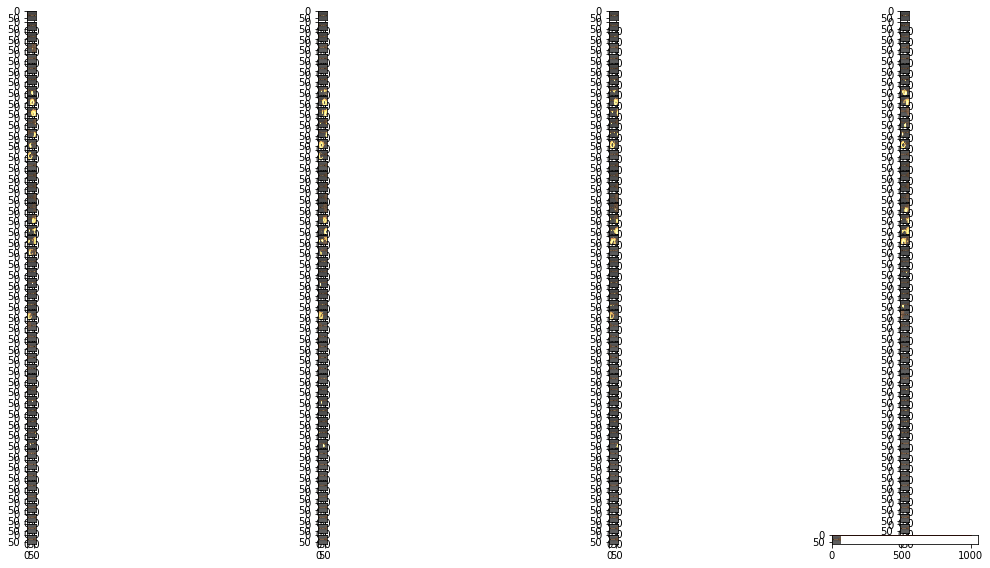

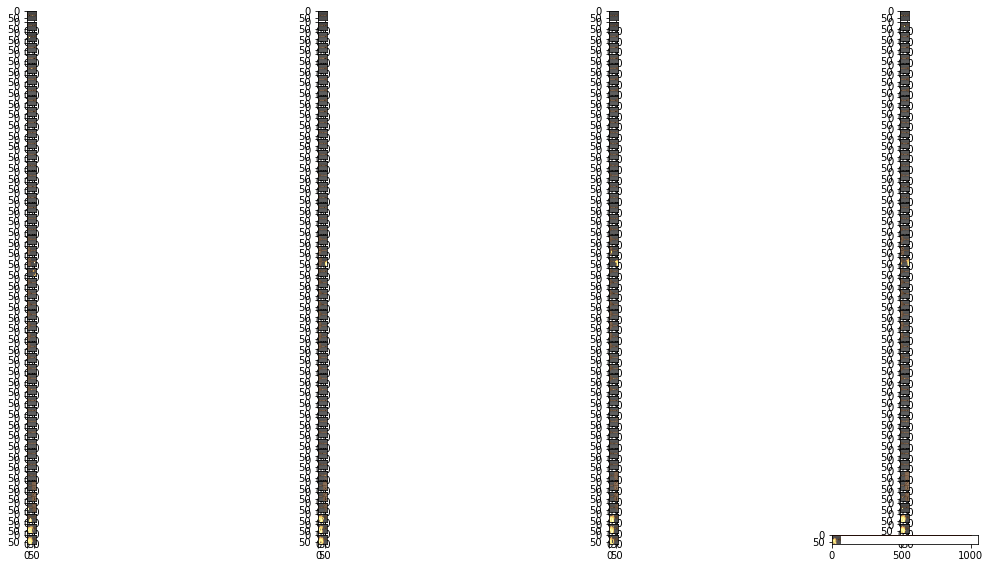

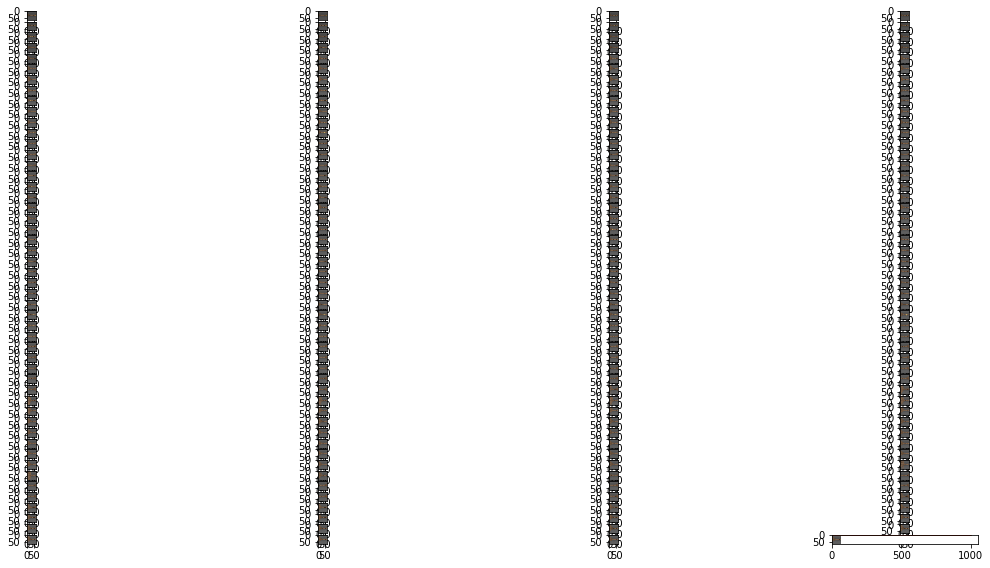

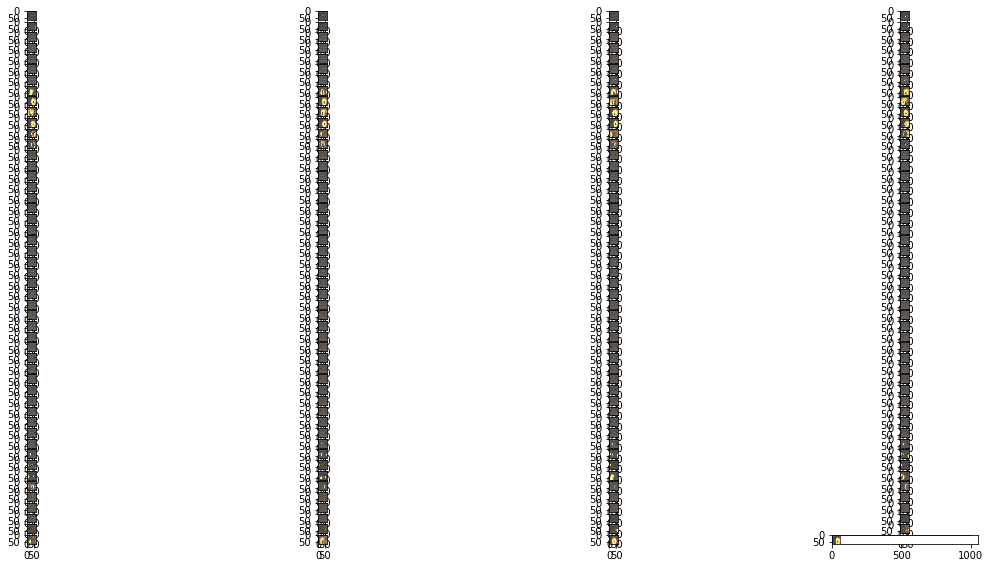

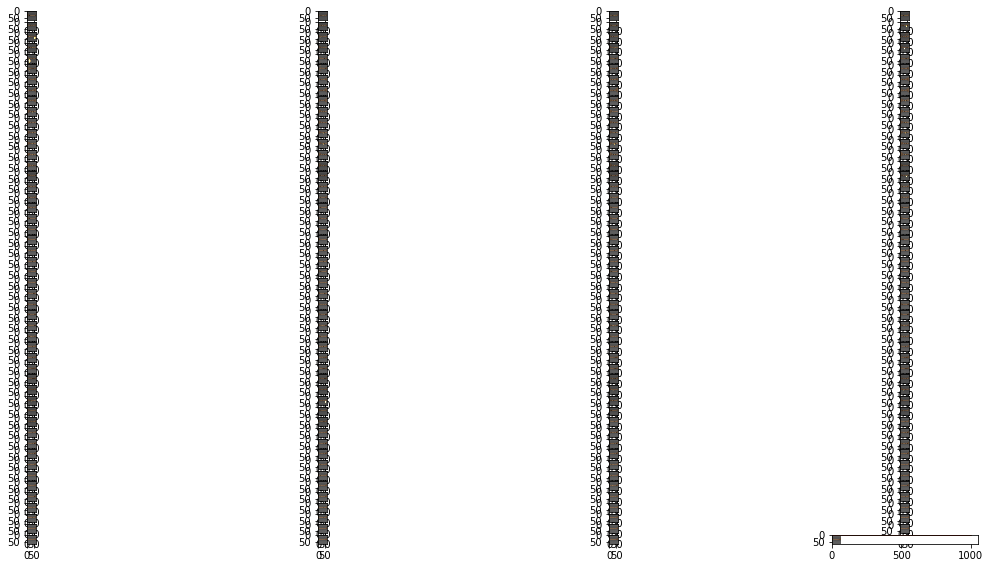

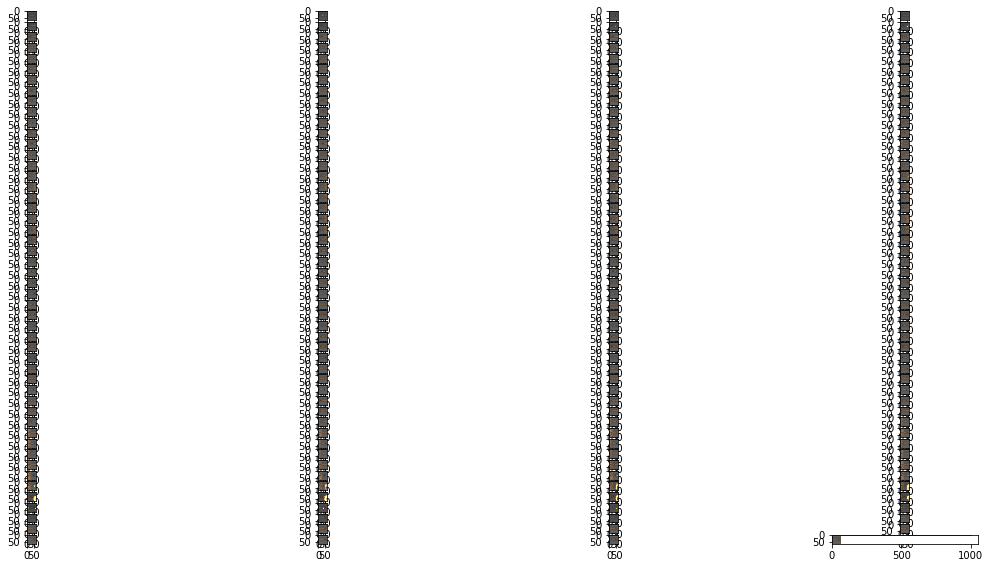

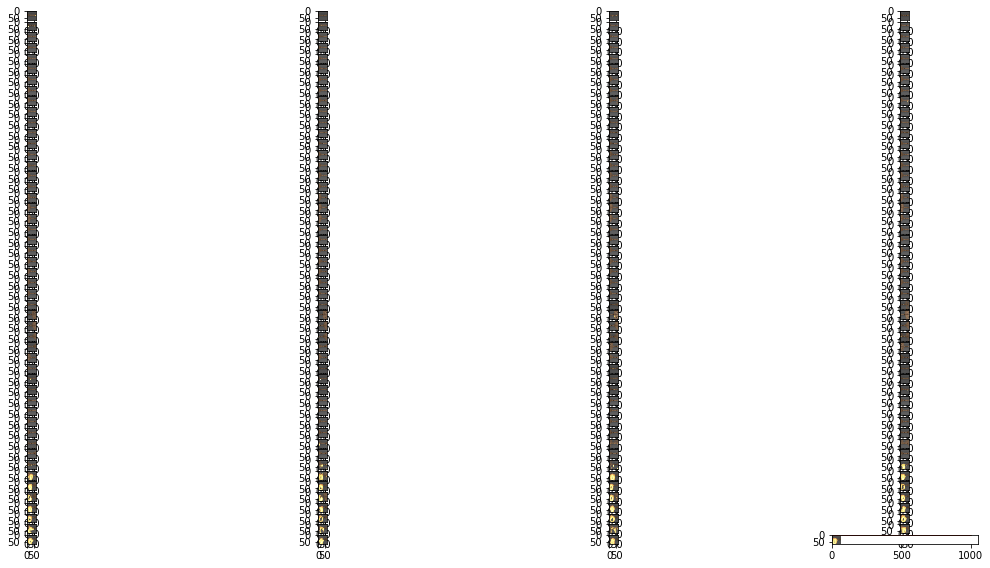

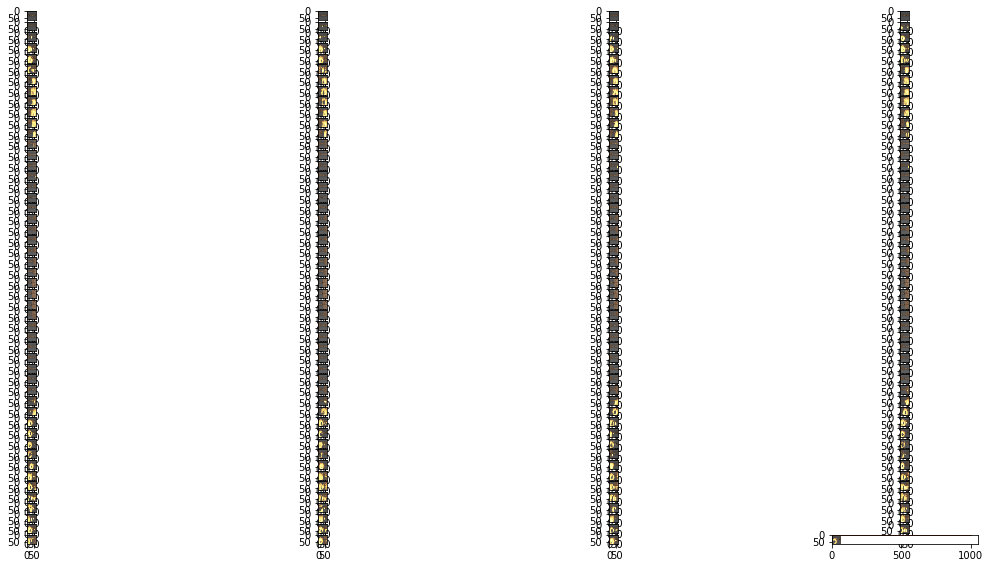

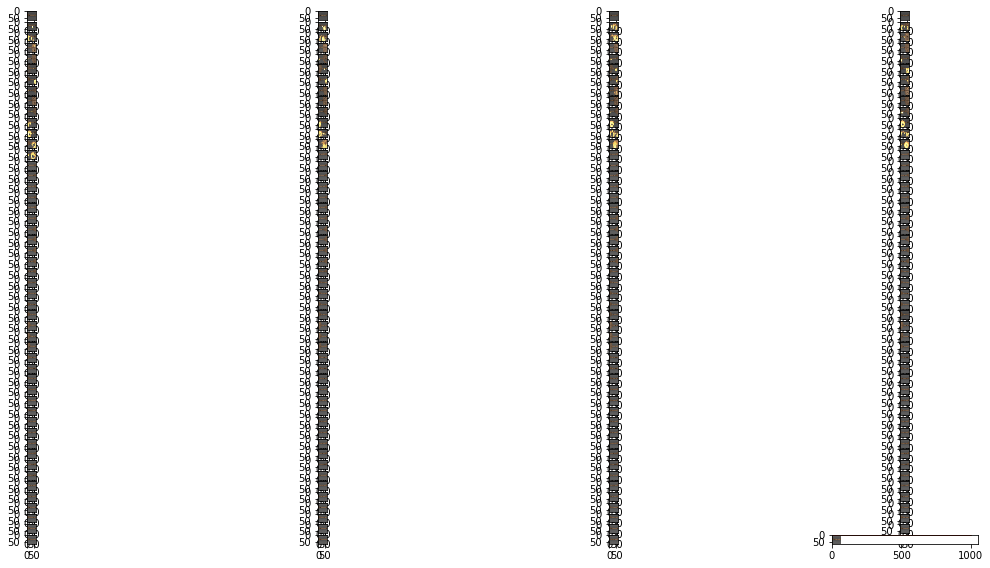

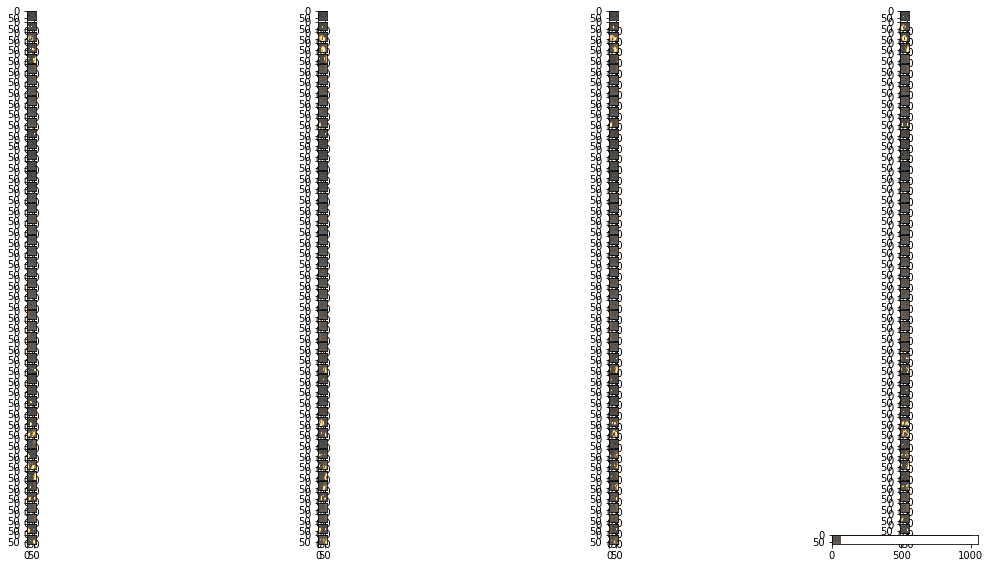

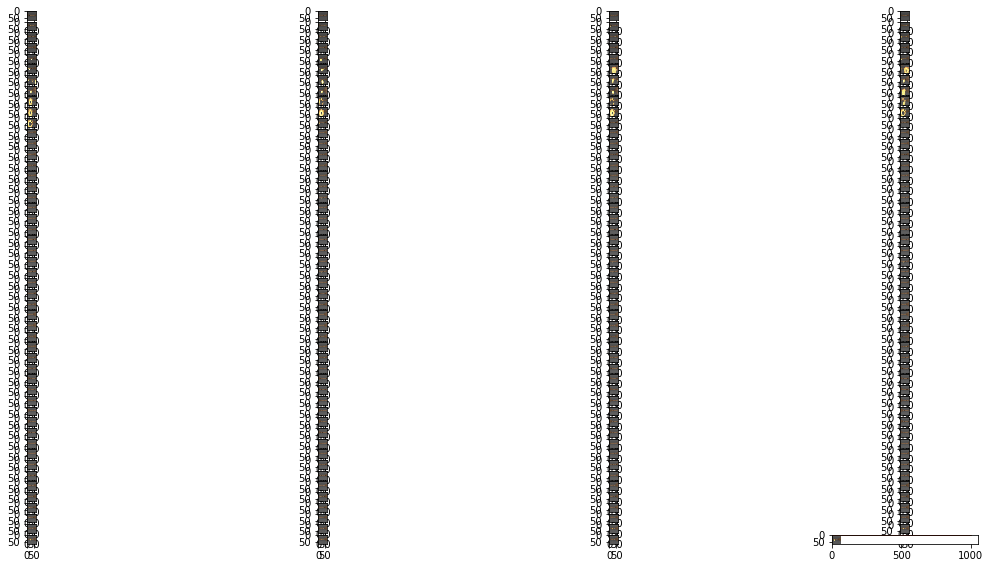

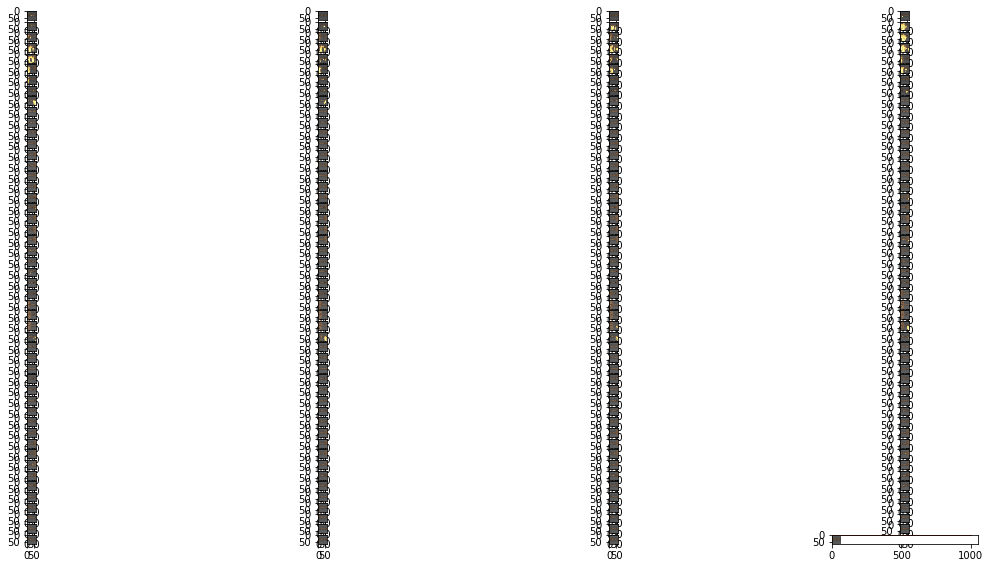

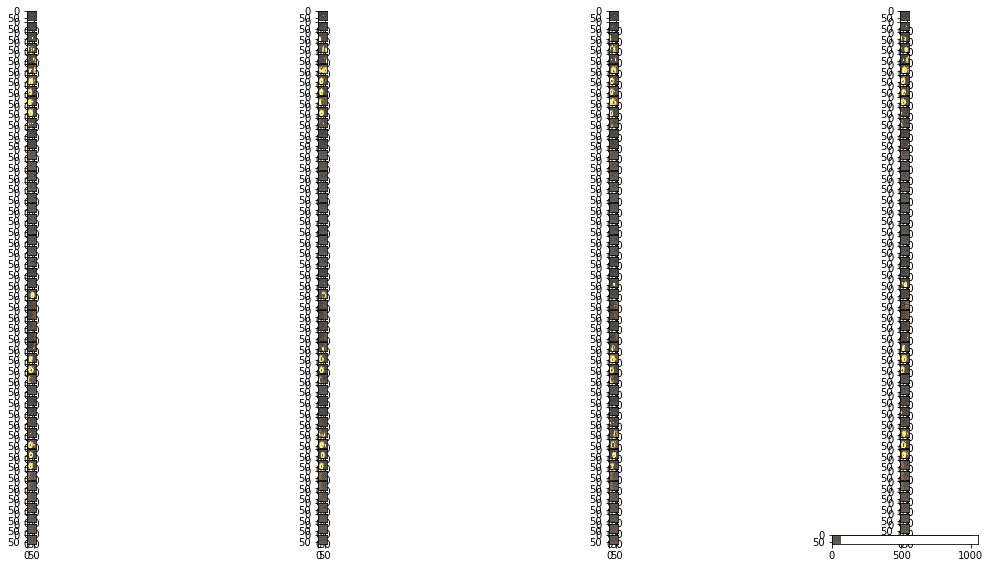

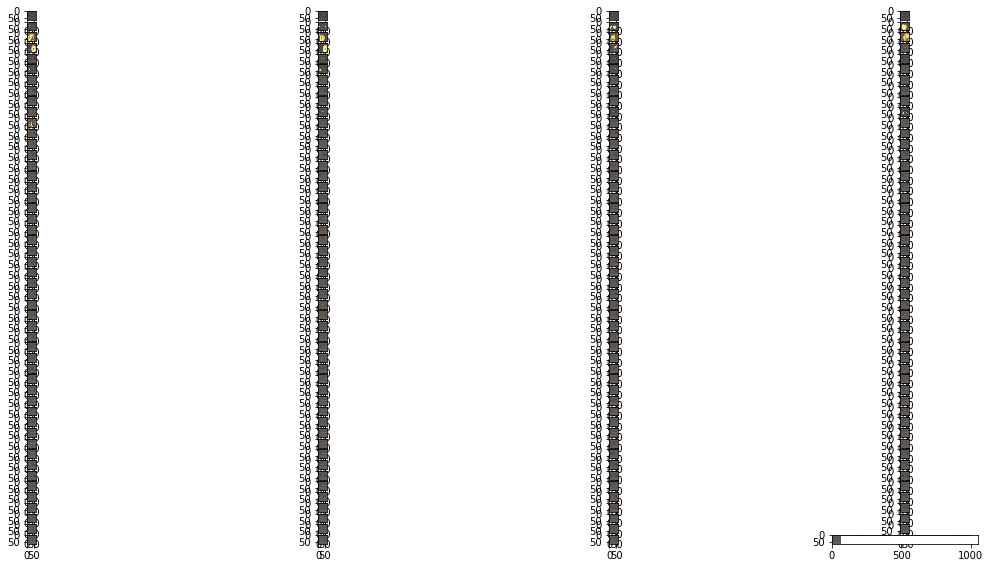

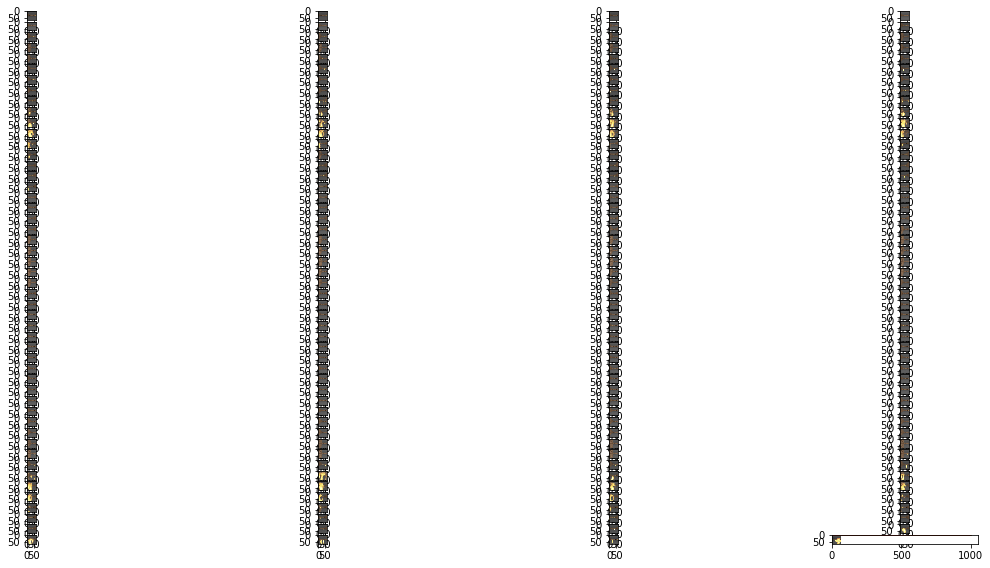

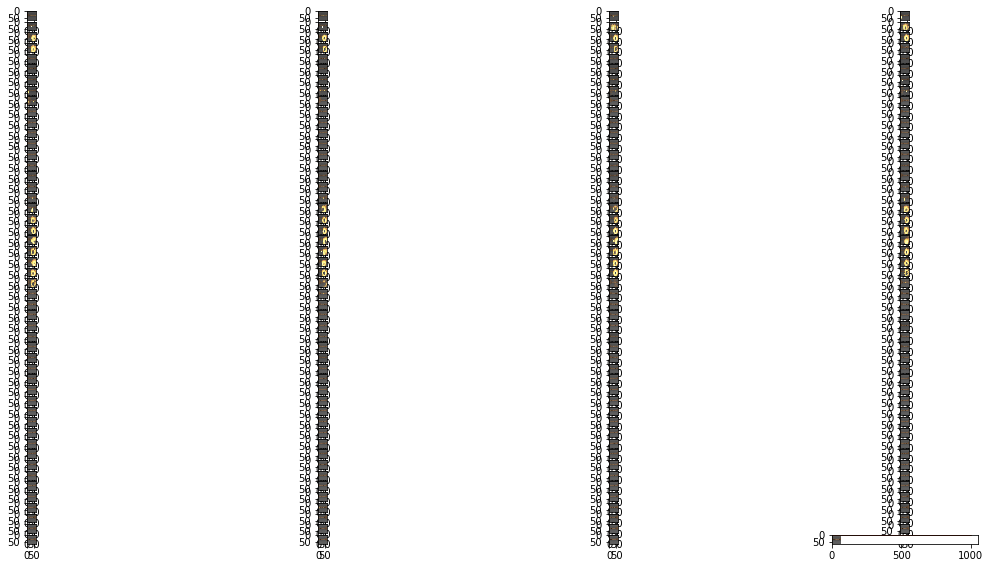

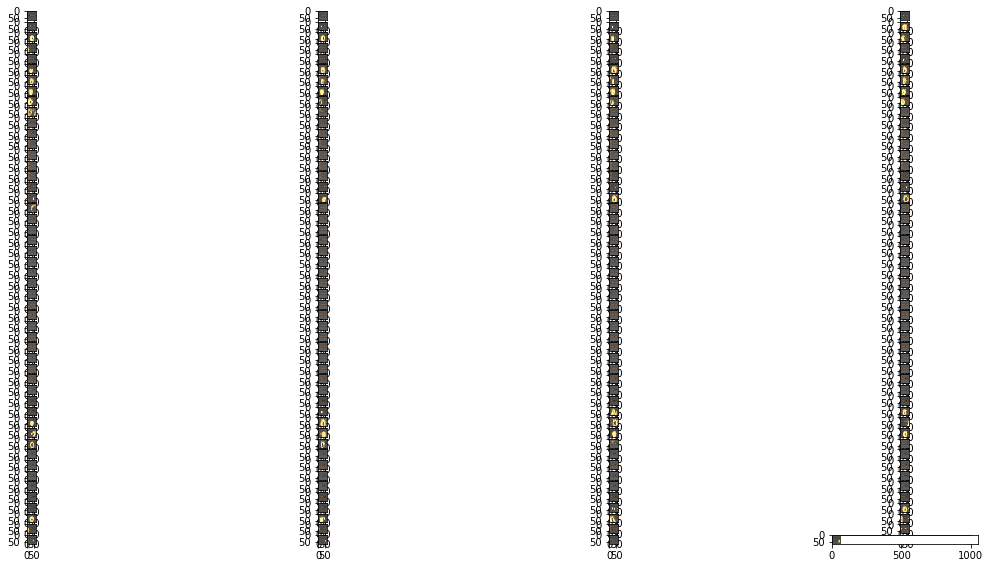

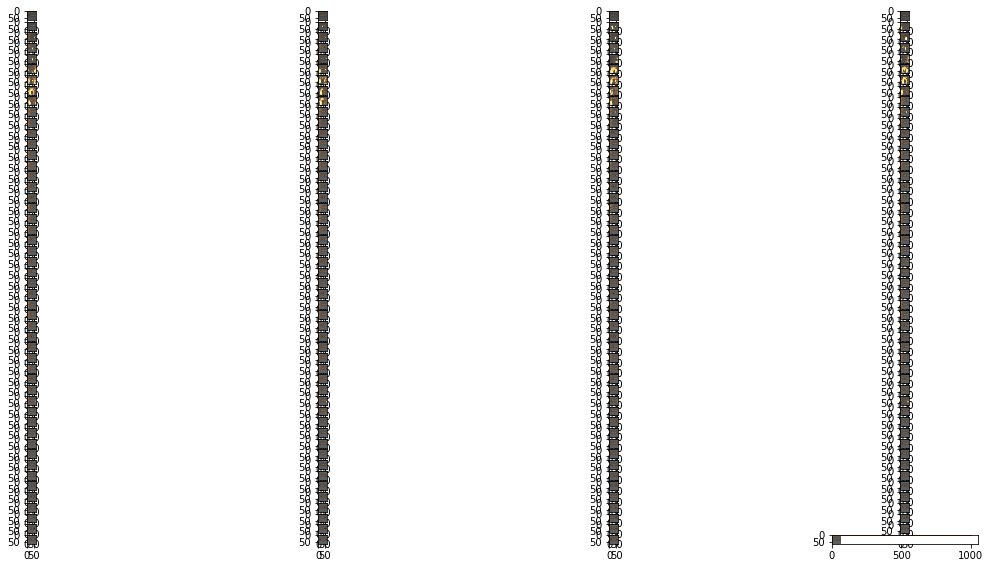

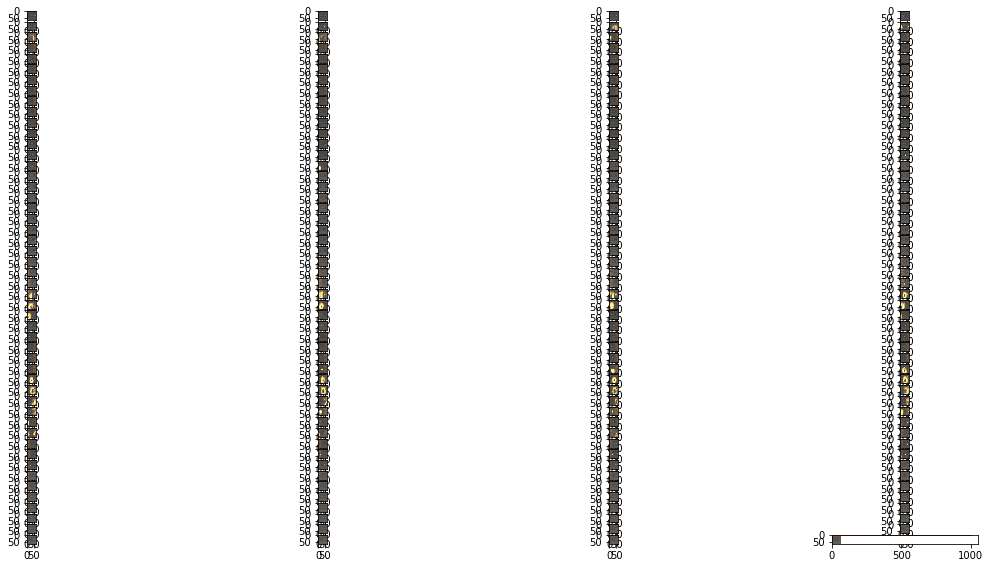

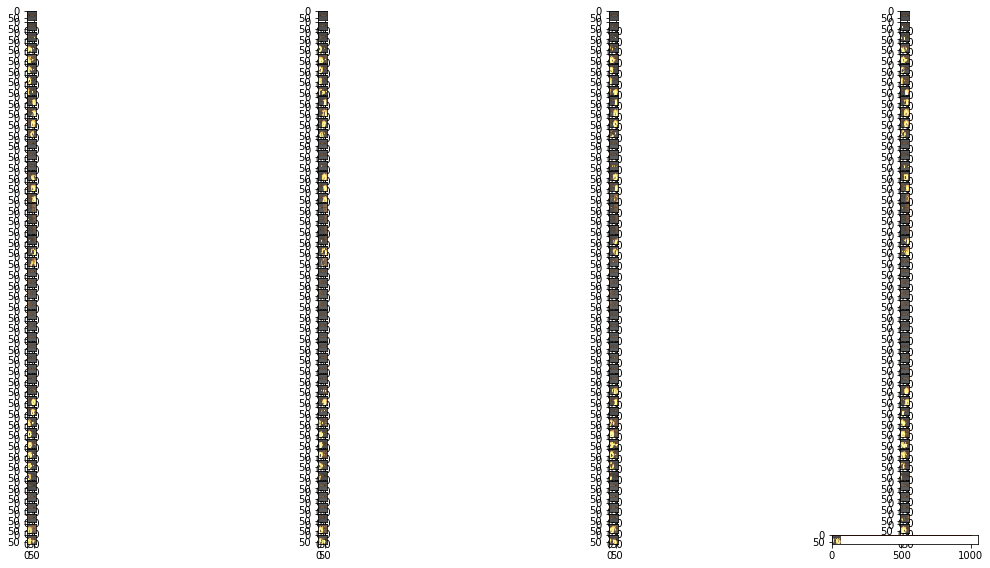

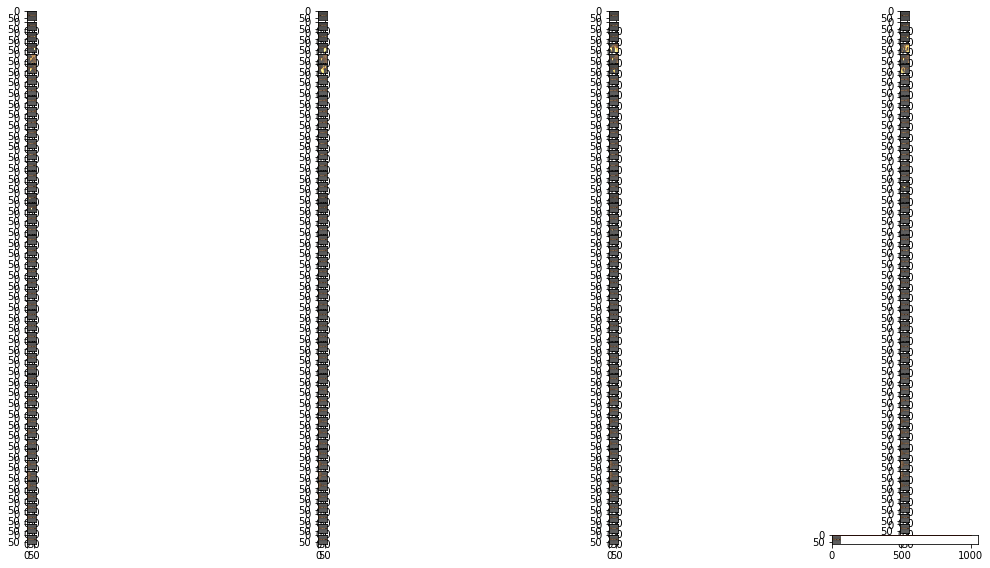

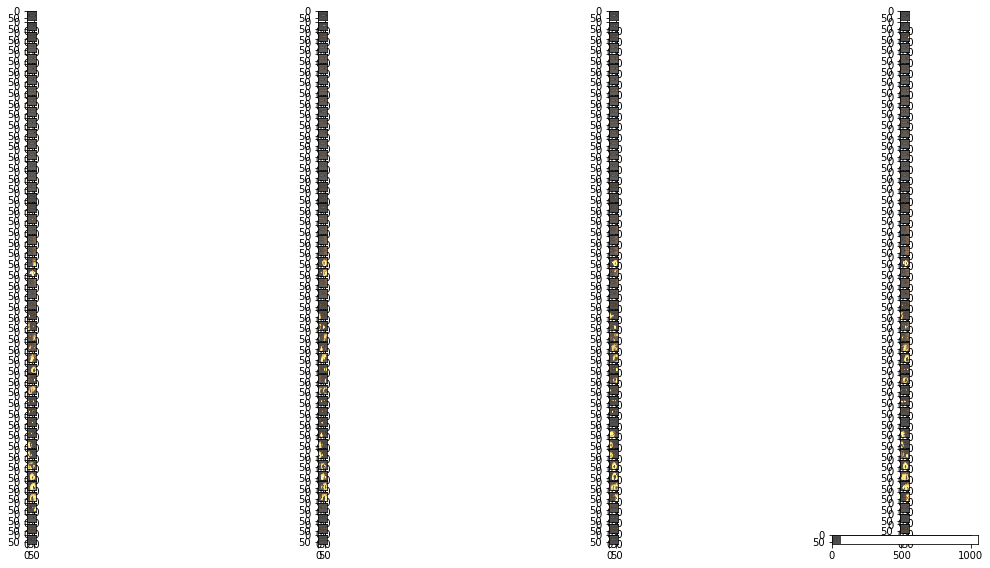

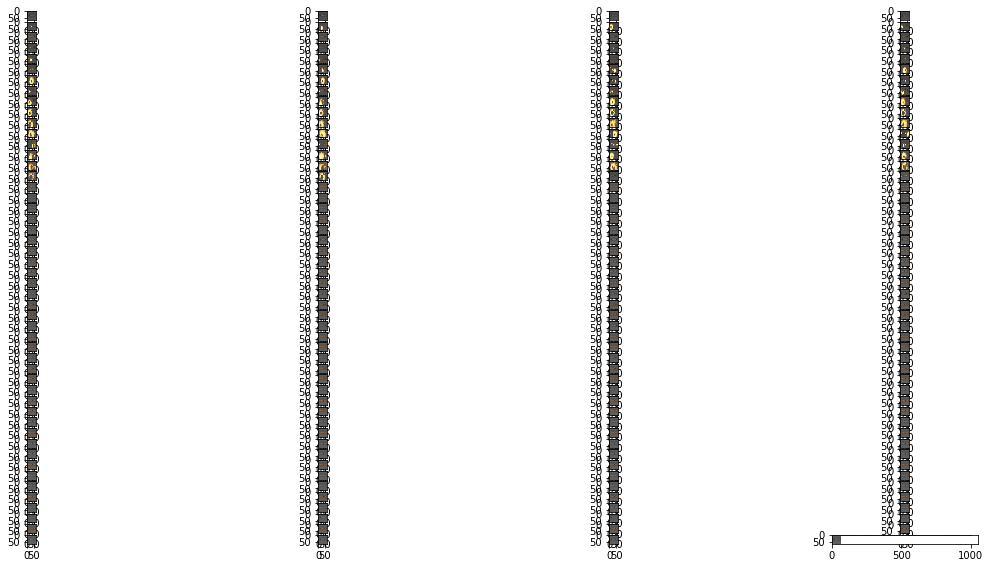

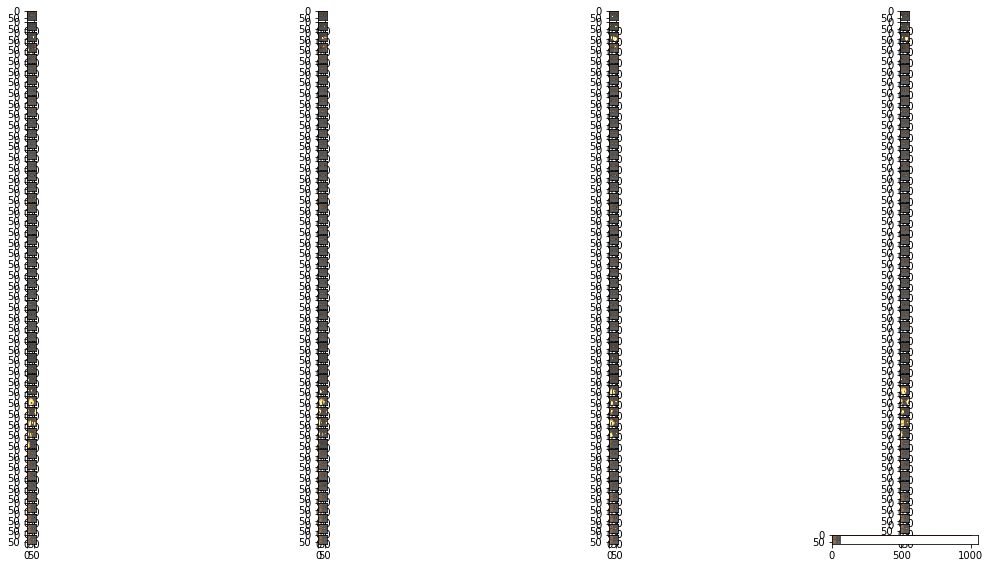

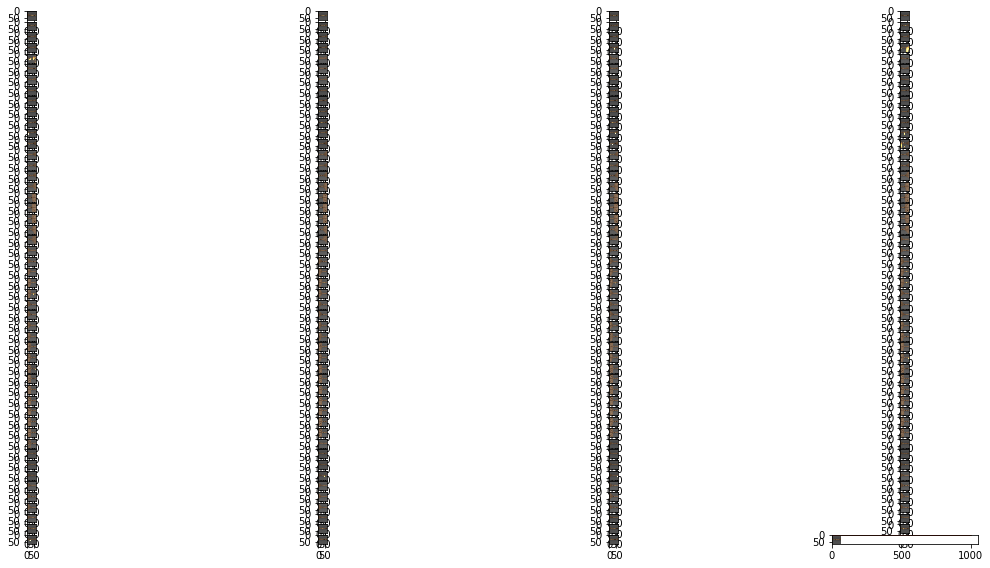

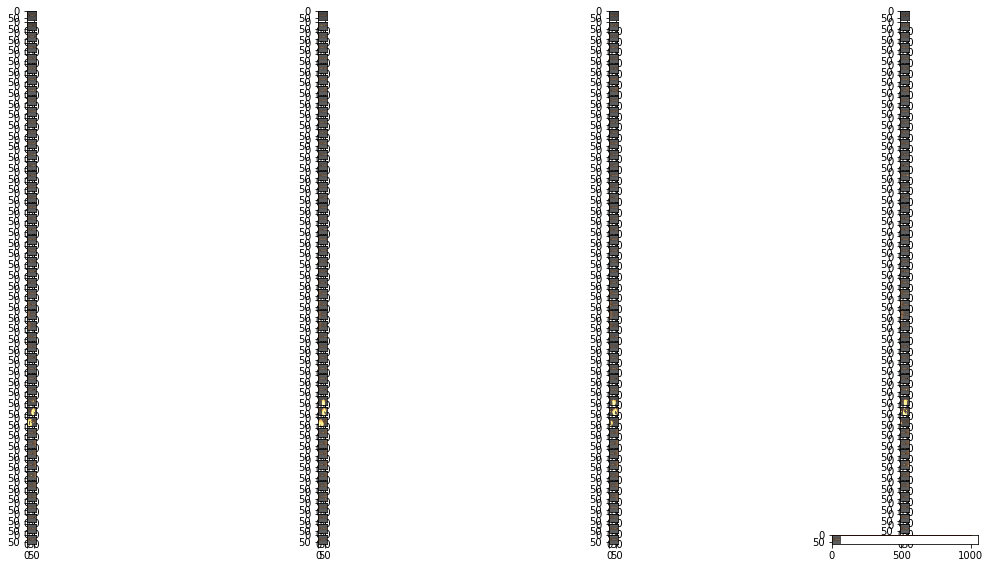

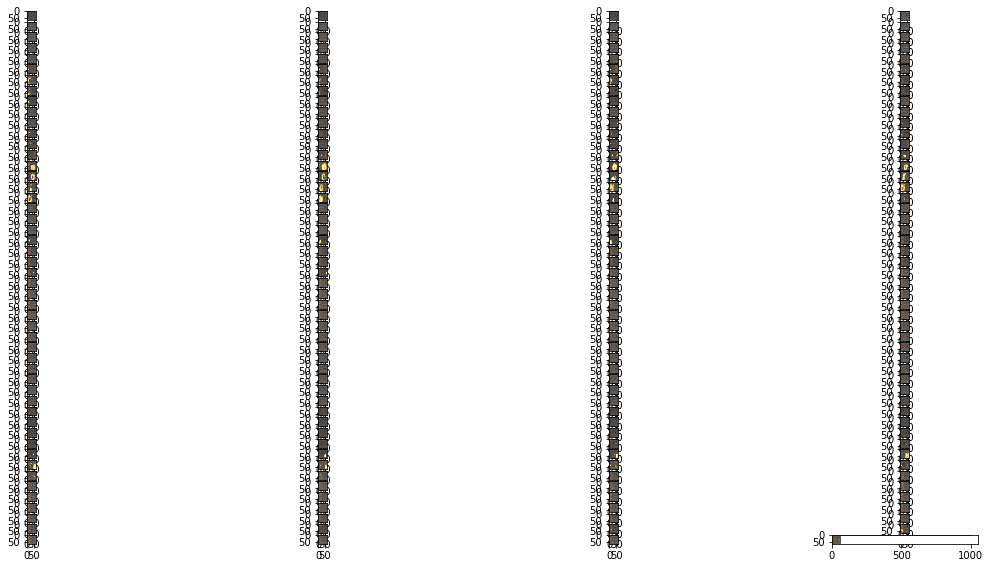

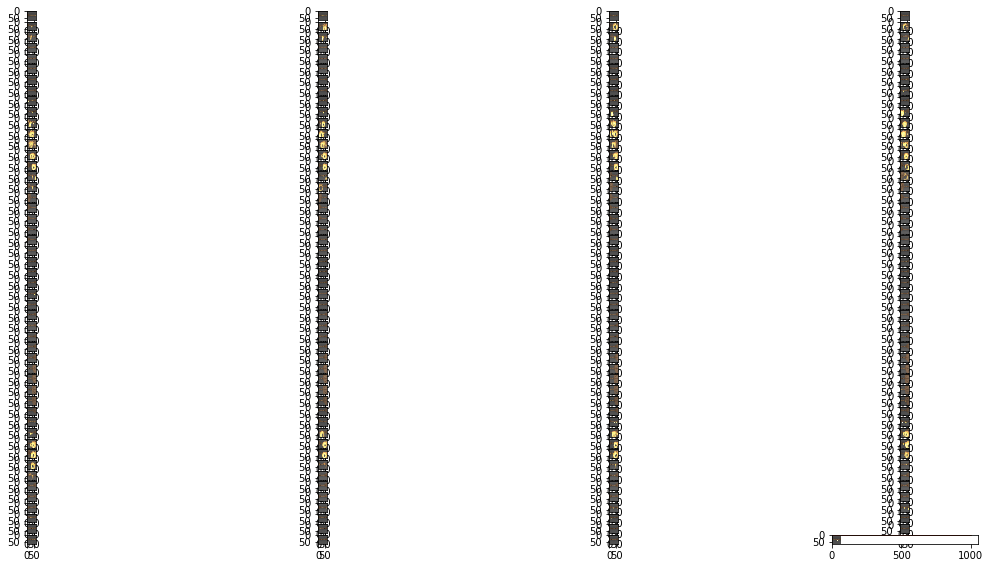

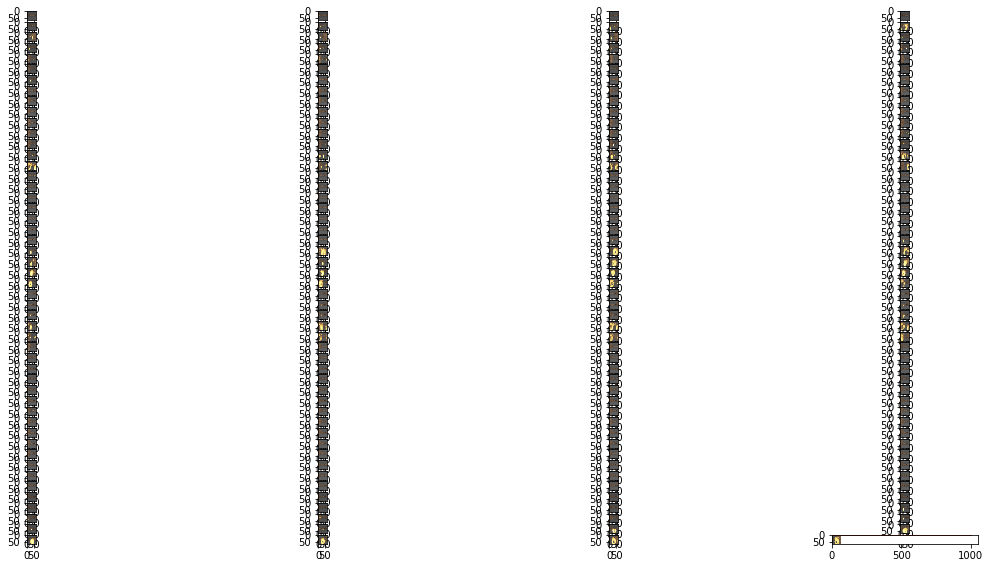

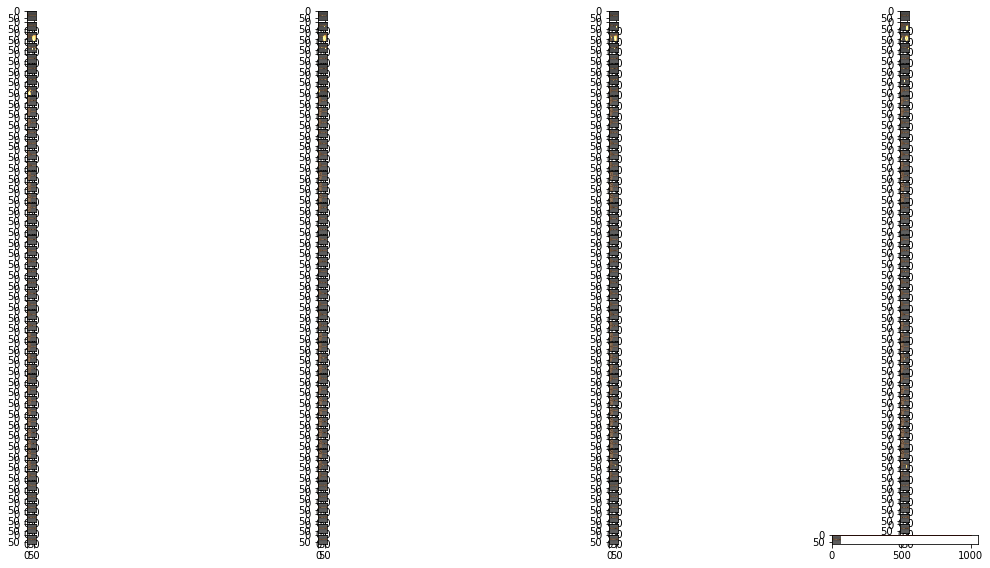

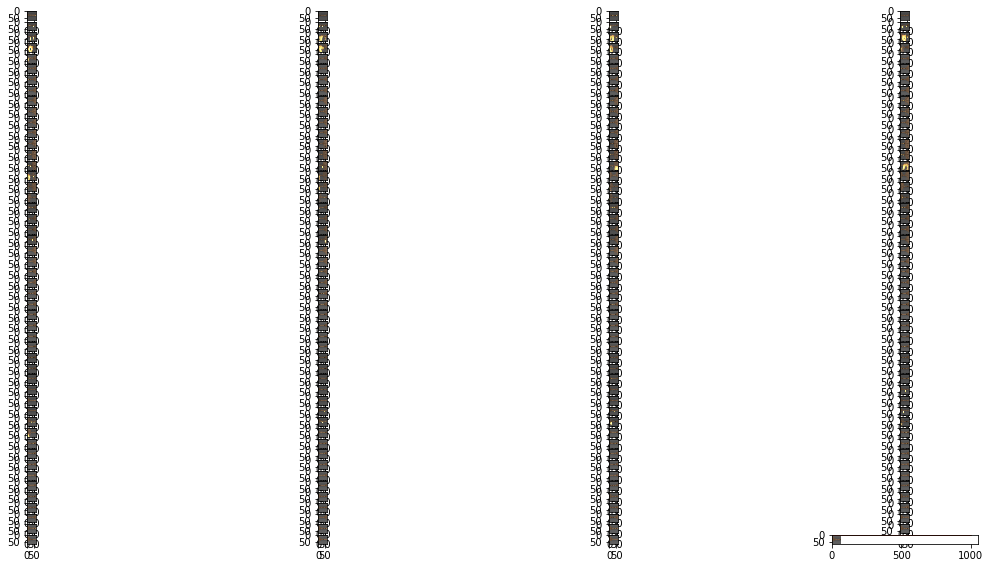

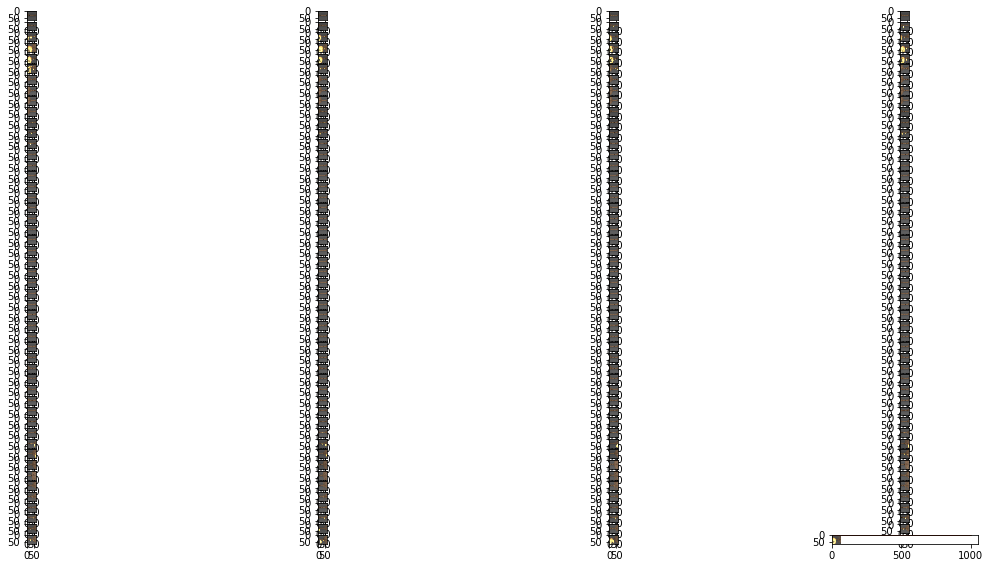

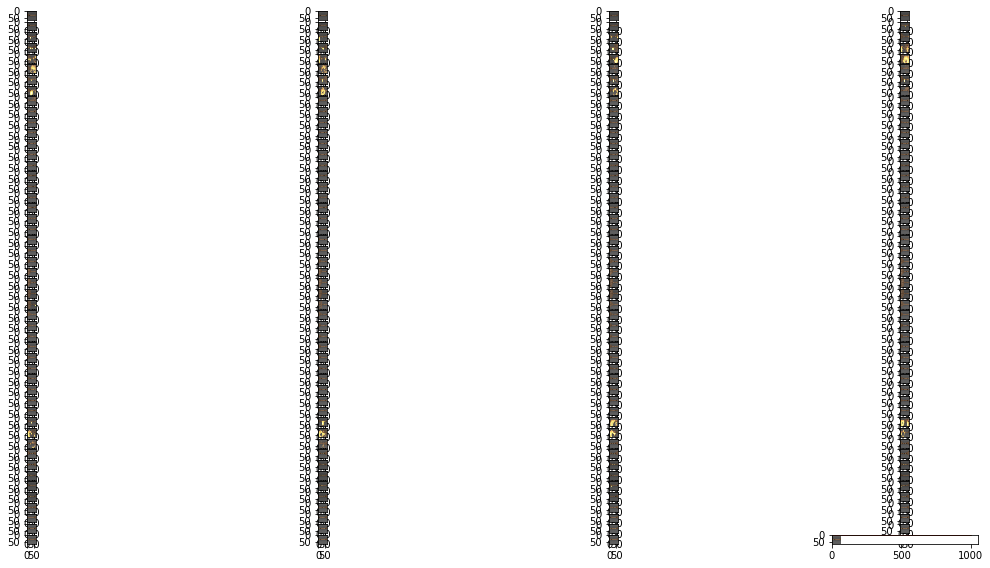

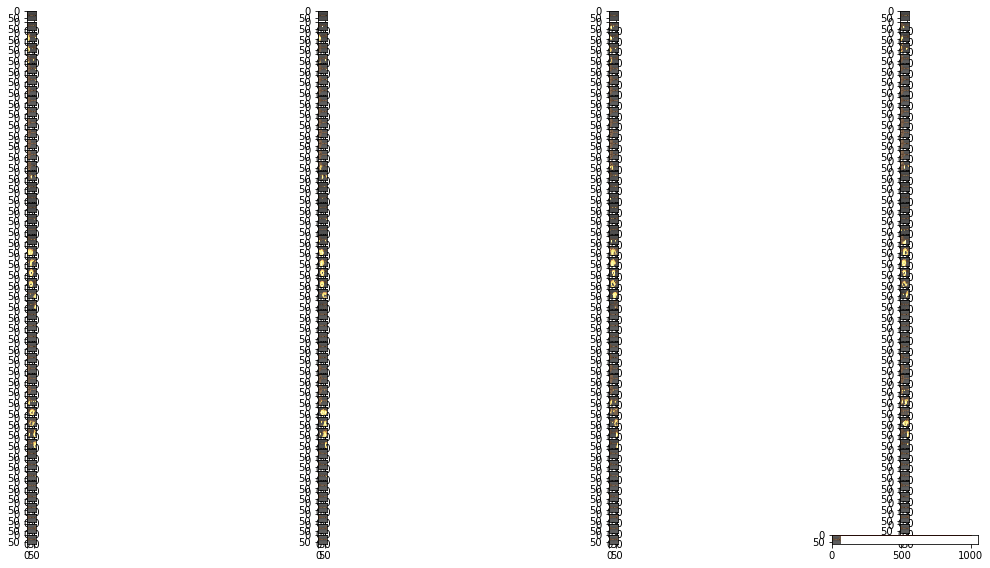

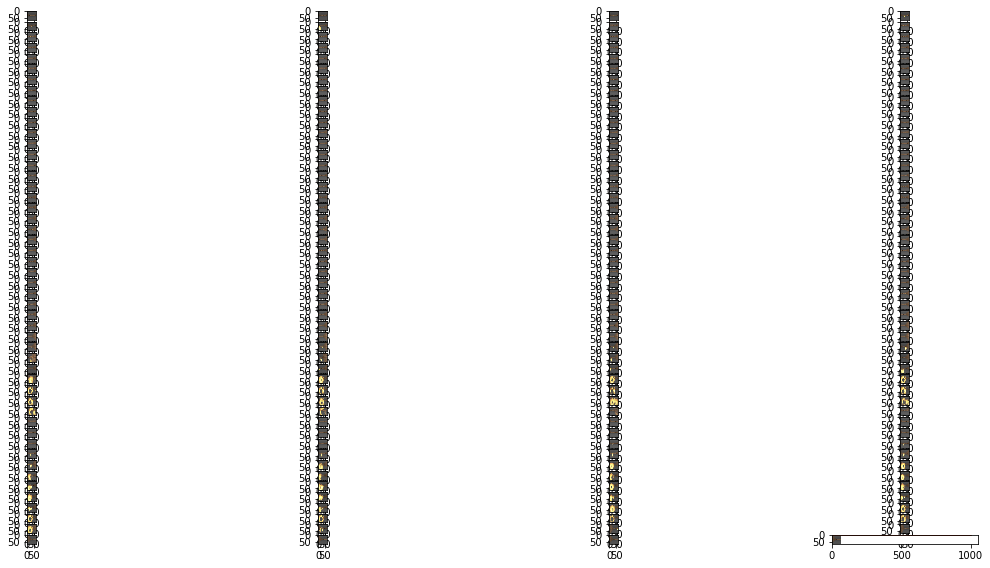

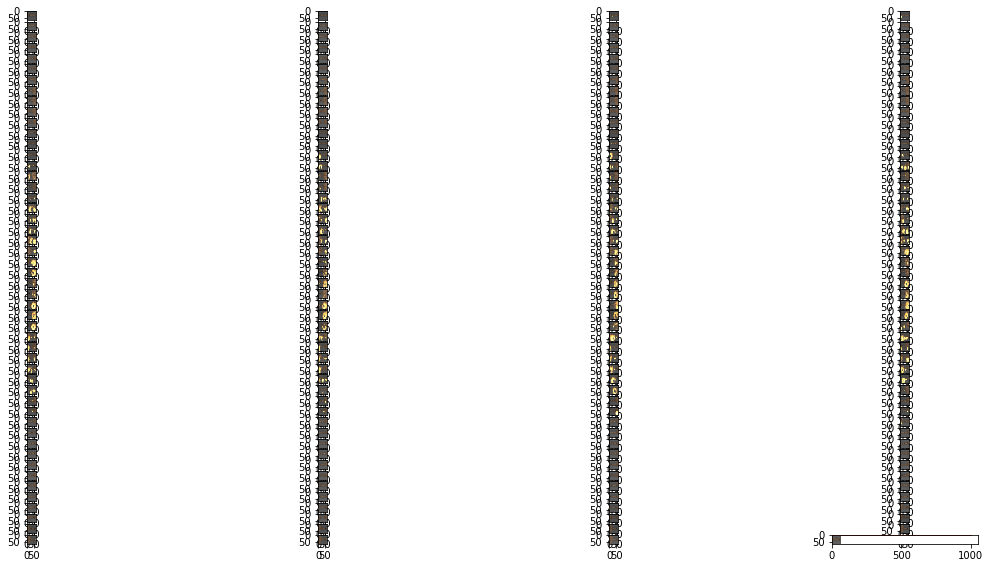

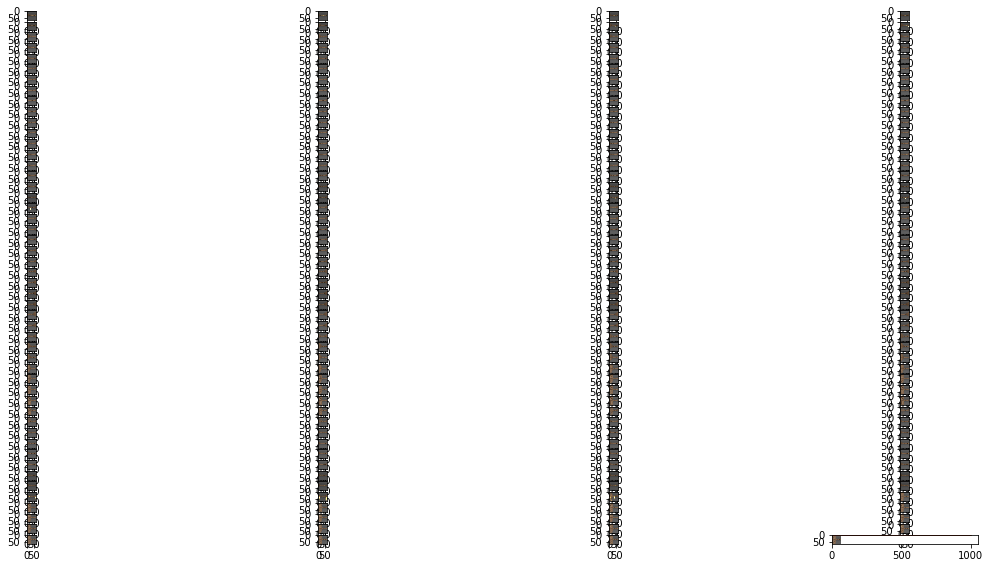

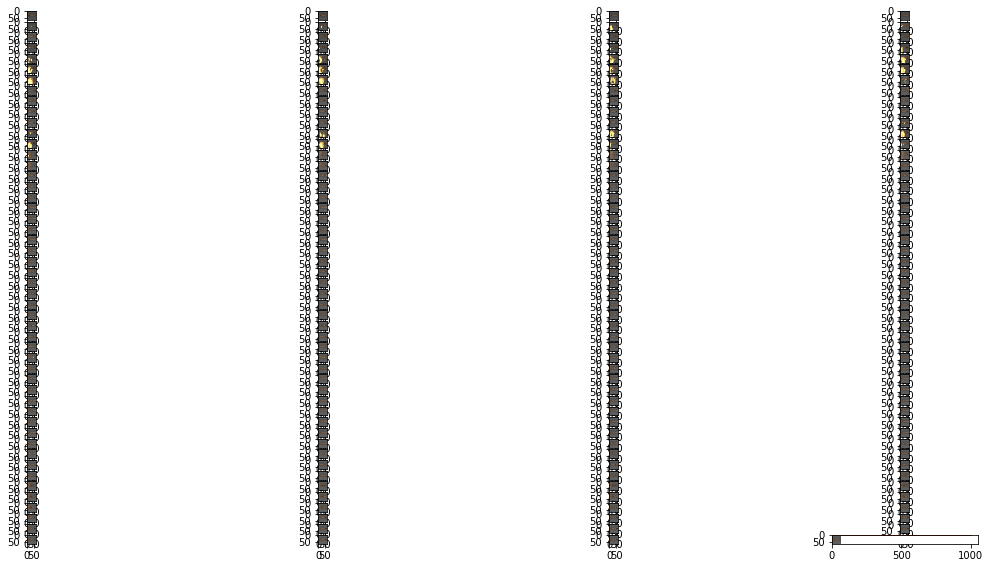

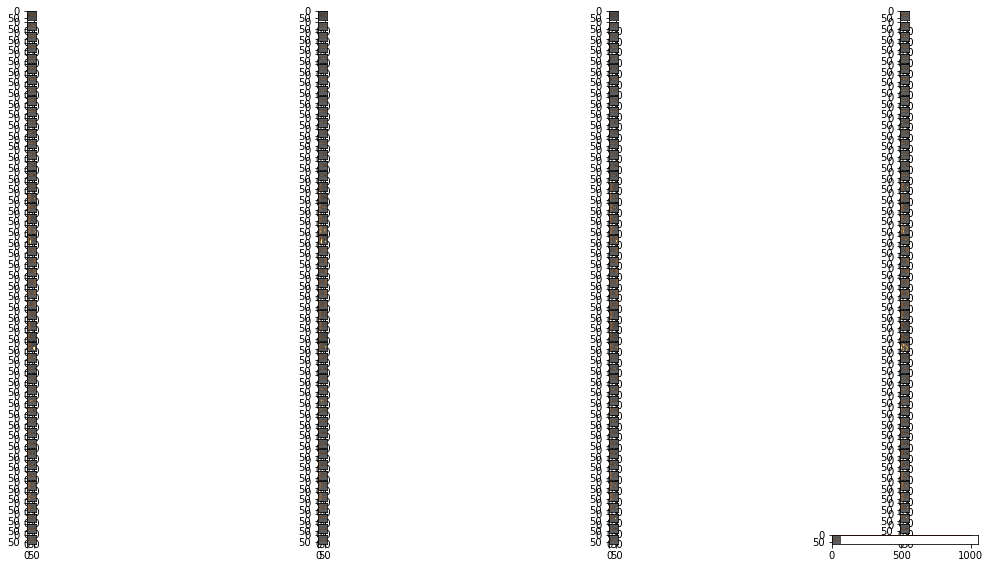

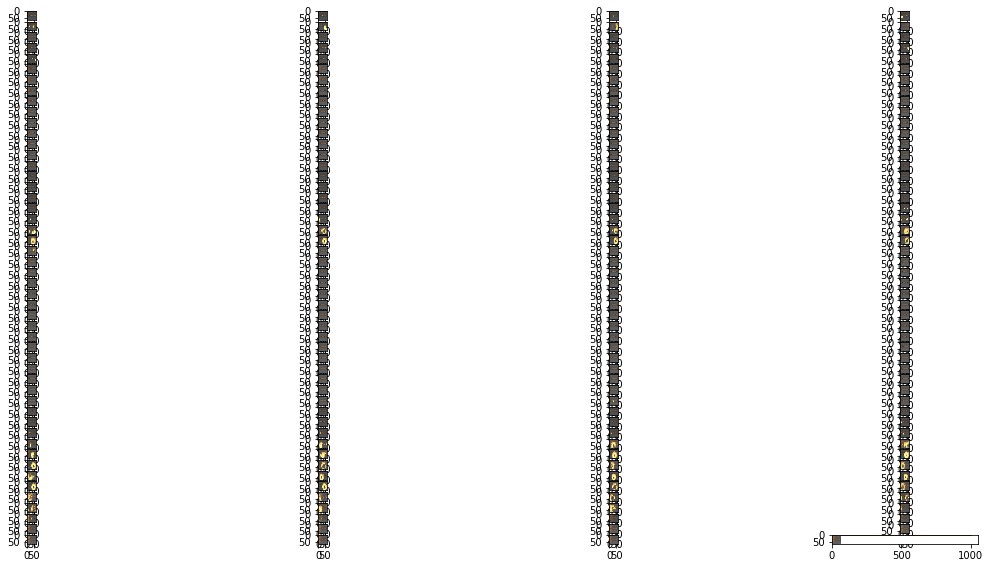

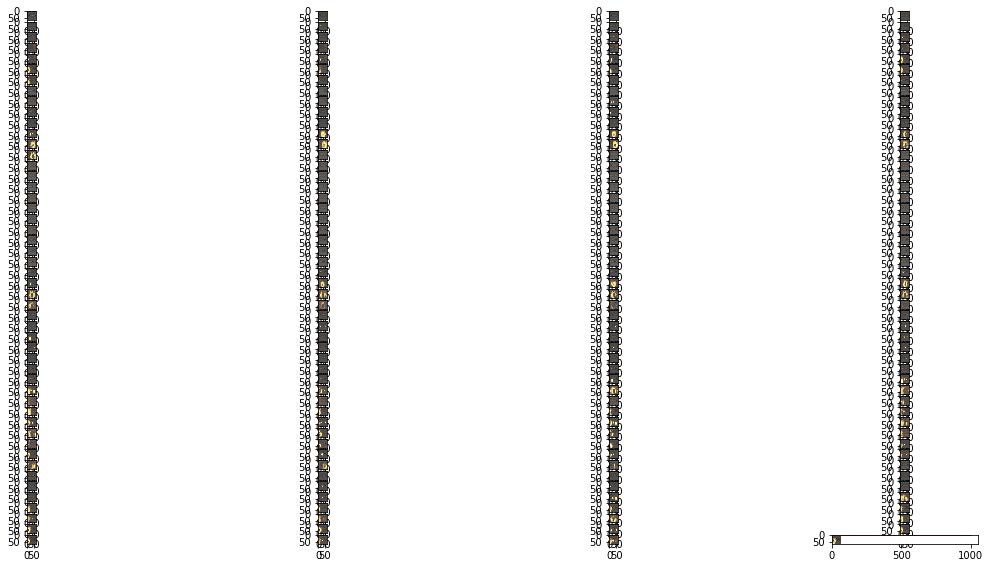

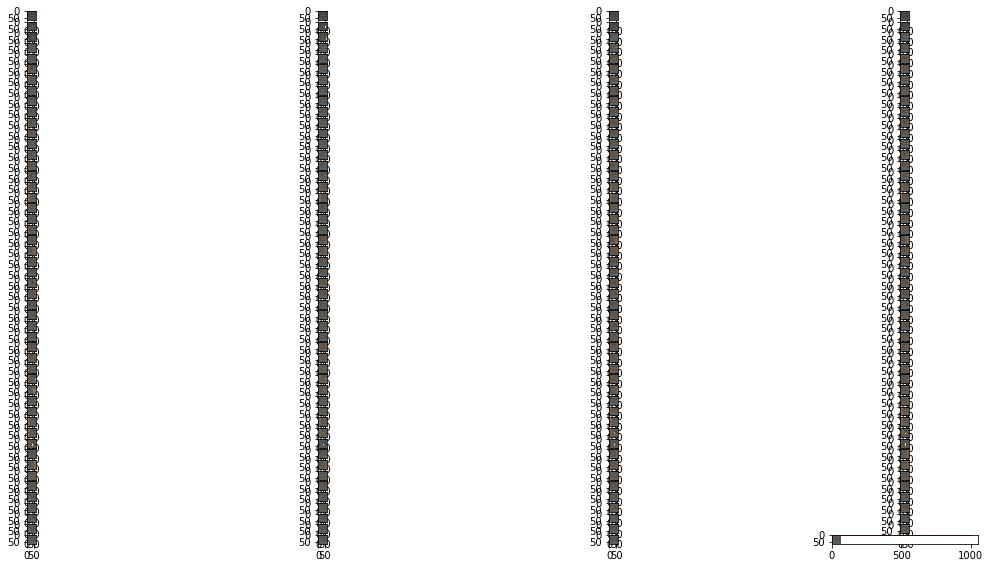

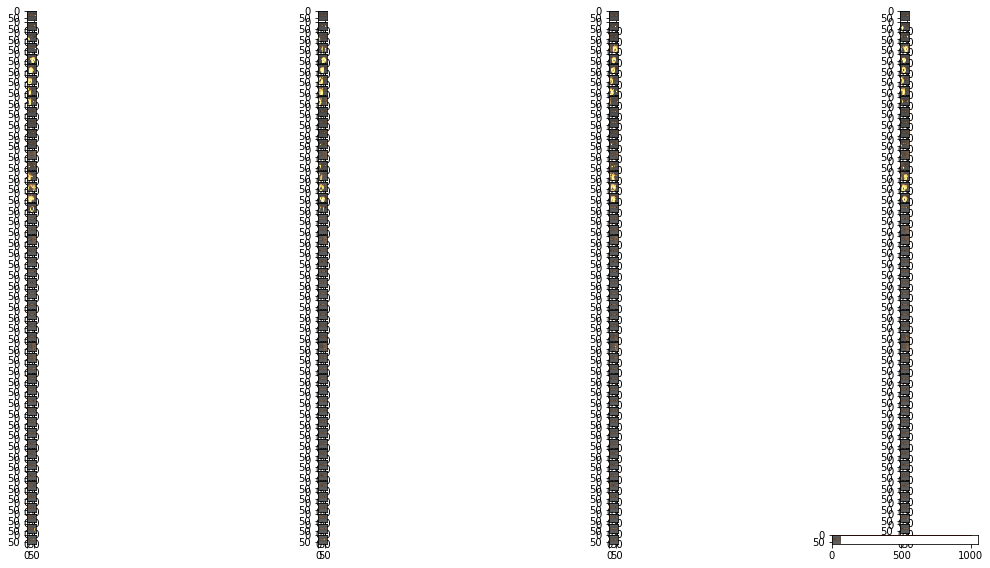

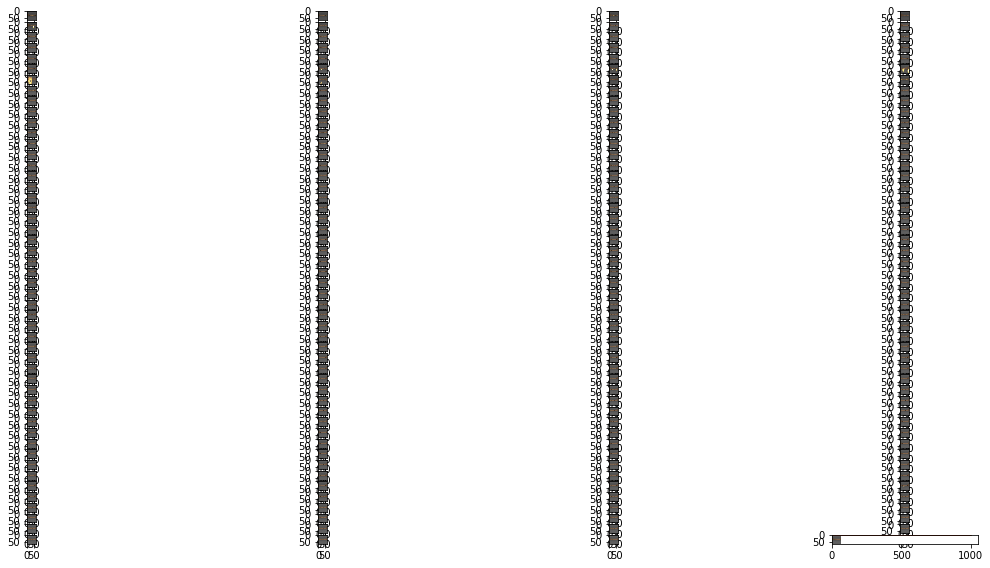

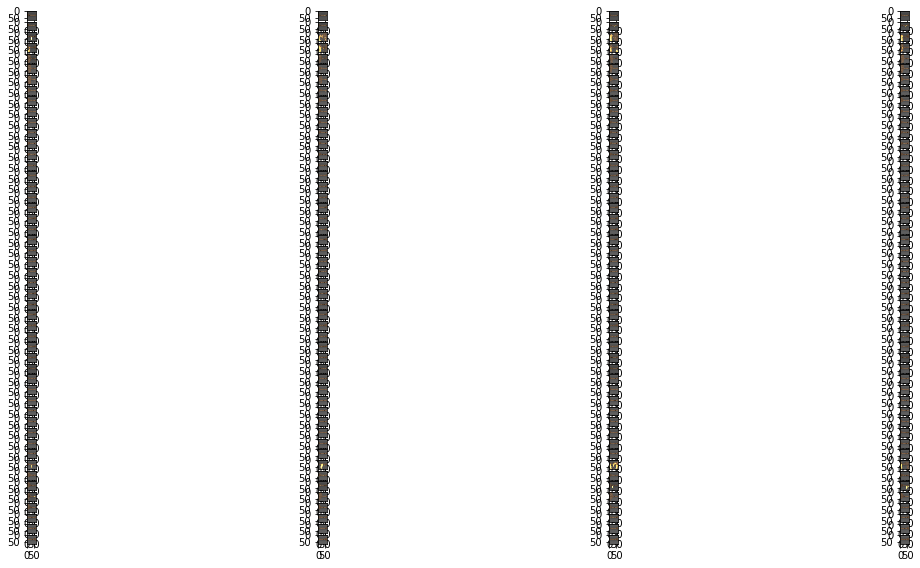

In [12]:
import pandas as pd
event_to_mixture_summary = []
main_mixture_summary = []
summary_num_events_handled_by_each_mixture = []
STATISTICAL_REPETITIONS = 5
SEQUENCE_LENGTH = 1000
for rep in range(STATISTICAL_REPETITIONS):
    for num_mixtures, rnn_model_list in rnn_analyzers.items():
        print(num_mixtures)
        if num_mixtures!=4:
            continue #Sticking to 4 now.
        for model in rnn_model_list:
            event_to_mixture, mixture_to_event, main_mixture = measure_dominating_mixture_for_events(model, 1000)
            event_to_mixture_summary.append(event_to_mixture)
            main_mixture_summary.append(main_mixture)
            num_events_handled_by_each_mixture={}
            for mixture, events in mixture_to_event.items():
                num_events_handled_by_each_mixture[mixture] = len(events)
            summary_num_events_handled_by_each_mixture.append(num_events_handled_by_each_mixture)
    
events_dataframe = pd.DataFrame(event_to_mixture_summary)
mixture_summary_dataframe = pd.DataFrame(main_mixture_summary)
summary_num_events_dataframe = pd.DataFrame(summary_num_events_handled_by_each_mixture)

In [13]:
print(events_dataframe)
print(main_mixture_summary)
print(summary_num_events_dataframe)

    explosion_main  explosion_other  fireball_main  fireball_other  \
0               19               24            268             198   
1               10                1            355             174   
2              127               14            329             286   
3                4                4            305             311   
4              168                7            256             237   
5              114                7            307             264   
6              400              199            115             204   
7              155              162            234             220   
8               21               11            206             331   
9               73               39            329             384   
10              96               90            335             169   
11              45               21            218             208   
12             138              103            270             246   
13              49  

In [20]:
def count_events_in_main_vs_other_mixtures(events_dataframe, event_name, main_mixture_summary, summary_num_events_dataframe):
    #Helps analyze if one mixture typically takes responsability
    #for analyzing one specific event.
    
    #Counting how often the event is present in the most common mixture,
    #vs all the others.
    event_in_main_mixture = events_dataframe[event_name+"_main"]
    event_in_other_mixtures = events_dataframe[event_name+"_other"]
    id_of_main_mixture = [d[event_name] for d in main_mixture_summary]
    
    total_num_main_mixture = []
    total_num_all_mixtures = []
    summary_num_events_dataframe=summary_num_events_dataframe.fillna(0)
    for index, row in summary_num_events_dataframe.iterrows():
        total_num_main_mixture.append(row[id_of_main_mixture[index]])
        total_num_all_mixtures.append(sum(row))

    total_non_main_mixture = np.subtract(np.array(total_num_all_mixtures), total_num_main_mixture)
    event_proportion_in_main=np.divide(event_in_main_mixture,np.add(event_in_other_mixtures,event_in_main_mixture))
    total_proportion_in_main=np.divide(total_num_main_mixture,total_num_all_mixtures)
                                
                                
    main_mixture_dict = {event_name: event_in_main_mixture,
                  "total" : total_num_main_mixture,
                        "main_mixture": "Yes"}
    non_main_mixture_dict = {event_name: event_in_other_mixtures,
                  "total": total_non_main_mixture,
                                "main_mixture":"No"}
    
    
    #Measures difference between: (Event modelled my MainMixture/TotalNumEvent) and
    #(total modelled by MainMixture/ totalAllEvents)
    main_model_proportion_dict_event = {event_name+"_proportion" : event_proportion_in_main, "event_only" :"Yes"}
    main_model_proportion_dict_total = {event_name+"_proportion": total_proportion_in_main, "event_only" : "No"}
    
    return_frame = pd.DataFrame(main_mixture_dict)
    return_frame_b = pd.DataFrame(non_main_mixture_dict)
    return_frame= return_frame.append(return_frame_b)
    
    main_model_proportion_frame = pd.DataFrame(main_model_proportion_dict_event)
    main_model_proportion_frame_b = pd.DataFrame(main_model_proportion_dict_total)
    main_model_proportion_frame = main_model_proportion_frame.append(main_model_proportion_frame_b)
    return return_frame, main_model_proportion_frame

In [21]:
from scipy.stats import mannwhitneyu

def significance_test(dataframe, event_name):
    #Does two tests of significance:
    #1. Are there significantly more occurences of event event_name
    #in the "main" mixture than in the others?
    #2. Are there significant differences between the number of total
    #events in the main mixture than others?
    #The latter controls for situations where all/very many events
    #end up being modelled by 1 mixture.
    main_mixture_data = dataframe.loc[dataframe['main_mixture'] == 'Yes']
    other_mixture_data = dataframe.loc[dataframe['main_mixture'] == 'No']
    event_main = main_mixture_data[event_name]
    total_main = main_mixture_data['total']
    event_other = other_mixture_data[event_name]
    total_other = other_mixture_data['total']
    
    print("Significant differences between number of the event in main vs all other mixtures")
    print("Significant differences between number of ANY event in main vs all other mixtures")

    print(mannwhitneyu(event_main, event_other, alternative='two-sided'))
    print(mannwhitneyu(total_main, total_other, alternative='two-sided'))

In [41]:
def significance_test_proportions_frame(proportions_frame):
    #Test if the "main mixture" is significantly more common for the
    #event∕situation than it is overall.
    event_only_proportion = proportions_frame.loc[proportions_frame['event_only'] == 'Yes']
    total_proportion = proportions_frame.loc[proportions_frame['event_only'] == 'No']
        
    print("Significant differences between proportion of the mixture in event vs in all frames")
    print(mannwhitneyu(event_only_proportion[event_only_proportion.columns[0]], total_proportion[total_proportion.columns[0]], alternative='two-sided'))

## Explosions

In [23]:
explosions_data, proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "explosion", main_mixture_summary, summary_num_events_dataframe)
print(explosions_data)
pd.melt(explosions_data, id_vars=['main_mixture'])

    explosion  total main_mixture
0          19    577          Yes
1          10    189          Yes
2         127    276          Yes
3           4    174          Yes
4         168    248          Yes
5         114    277          Yes
6         400    487          Yes
7         155    568          Yes
8          21    167          Yes
9          73    220          Yes
10         96    219          Yes
11         45    228          Yes
12        138    573          Yes
13         49    184          Yes
14         64    168          Yes
15        149    421          Yes
16         74    115          Yes
17          0     85          Yes
18         90    187          Yes
19          0    750          Yes
20         32    177          Yes
21        130    305          Yes
22        226    260          Yes
23         69    211          Yes
24         75    505          Yes
25         64    212          Yes
26         81    312          Yes
27        261    441          Yes
28         33 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


main_mixture   variable  value
0            Yes  explosion     19
1            Yes  explosion     10
2            Yes  explosion    127
3            Yes  explosion      4
4            Yes  explosion    168
5            Yes  explosion    114
6            Yes  explosion    400
7            Yes  explosion    155
8            Yes  explosion     21
9            Yes  explosion     73
10           Yes  explosion     96
11           Yes  explosion     45
12           Yes  explosion    138
13           Yes  explosion     49
14           Yes  explosion     64
15           Yes  explosion    149
16           Yes  explosion     74
17           Yes  explosion      0
18           Yes  explosion     90
19           Yes  explosion      0
20           Yes  explosion     32
21           Yes  explosion    130
22           Yes  explosion    226
23           Yes  explosion     69
24           Yes  explosion     75
25           Yes  explosion     64
26           Yes  explosion     81
27           Yes  explosion    261
28           Yes  explosion     33
29           Yes  explosion    131
..           ...        ...    ...
210           No      total    774
211           No      total    804
212           No      total    787
213           No      total    704
214           No      total    673
215           No      total    881
216           No      total    527
217           No      total    742
218           No      total    731
219           No      total    881
220           No      total    932
221           No      total    728
222           No      total    795
223           No      total    768
224           No      total    633
225           No      total    808
226           No      total    828
227           No      total    820
228           No      total    405
229           No      total    680
230           No      total    583
231           No      total    869
232           No      total    885
233           No      total    819
234           No      total    815
235           No      total    465
236           No      total    985
237           No      total    716
238           No      total    967
239           No      total    814

[240 rows x 3 columns]

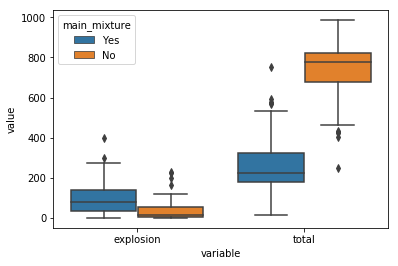

In [24]:
import seaborn as sns
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(explosions_data, id_vars=['main_mixture']))



In [25]:
significance_test(explosions_data, 'explosion')

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2639.5, pvalue=1.0572780502652836e-05)
MannwhitneyuResult(statistic=119.0, pvalue=1.1405280639276962e-18)


Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=2943.0, pvalue=2.013482242406131e-09)
None


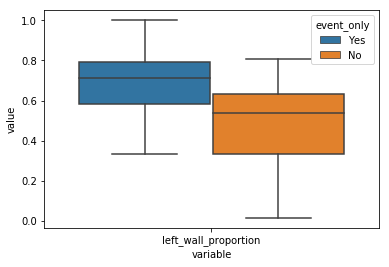

In [42]:
print(significance_test_proportions_frame(proportions_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportions_frame, id_vars=['event_only']))

## Left Walls

In [44]:
left_walls_data, proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "left_wall", main_mixture_summary, summary_num_events_dataframe)
significance_test(left_walls_data, "left_wall")
#Result: Left wall far more common in main mixture. However, the total
#distribution of this mixture is not significantly larger than others.
pd.melt(left_walls_data, id_vars=['main_mixture'])

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2618.5, pvalue=1.750598857121085e-05)
MannwhitneyuResult(statistic=1686.0, pvalue=0.5513564288171047)


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


main_mixture   variable  value
0            Yes  left_wall    113
1            Yes  left_wall     98
2            Yes  left_wall    111
3            Yes  left_wall     49
4            Yes  left_wall     22
5            Yes  left_wall     41
6            Yes  left_wall     17
7            Yes  left_wall      7
8            Yes  left_wall      5
9            Yes  left_wall     45
10           Yes  left_wall      3
11           Yes  left_wall     56
12           Yes  left_wall     16
13           Yes  left_wall      0
14           Yes  left_wall     32
15           Yes  left_wall     38
16           Yes  left_wall     70
17           Yes  left_wall    250
18           Yes  left_wall     39
19           Yes  left_wall      3
20           Yes  left_wall    177
21           Yes  left_wall    187
22           Yes  left_wall    113
23           Yes  left_wall     42
24           Yes  left_wall     96
25           Yes  left_wall      3
26           Yes  left_wall      2
27           Yes  left_wall     75
28           Yes  left_wall    116
29           Yes  left_wall     92
..           ...        ...    ...
210           No      total    433
211           No      total    363
212           No      total    427
213           No      total    626
214           No      total    610
215           No      total    236
216           No      total    901
217           No      total    936
218           No      total    761
219           No      total    451
220           No      total    341
221           No      total    460
222           No      total    594
223           No      total    435
224           No      total    497
225           No      total    515
226           No      total    336
227           No      total    375
228           No      total    405
229           No      total    495
230           No      total    851
231           No      total    288
232           No      total    282
233           No      total    304
234           No      total    458
235           No      total    669
236           No      total    243
237           No      total    562
238           No      total    213
239           No      total    356

[240 rows x 3 columns]

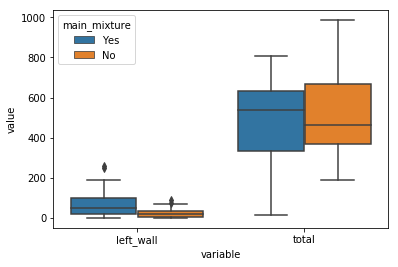

In [31]:
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(left_walls_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=2943.0, pvalue=2.013482242406131e-09)
None


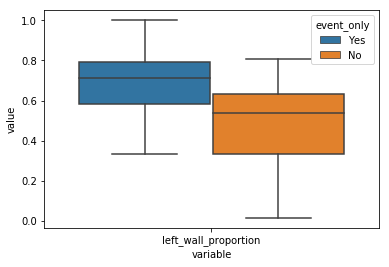

In [45]:
print(significance_test_proportions_frame(proportions_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportions_frame, id_vars=['event_only']))

## Right Walls

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2226.0, pvalue=0.02391217629842082)
MannwhitneyuResult(statistic=938.0, pvalue=6.133518159294231e-06)


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


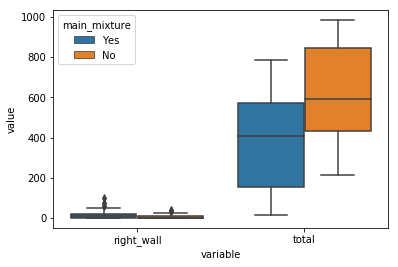

In [46]:
right_walls_data, proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "right_wall", main_mixture_summary, summary_num_events_dataframe)
significance_test(right_walls_data, "right_wall")
pd.melt(right_walls_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(right_walls_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=3168.5, pvalue=6.933062385866509e-13)
None


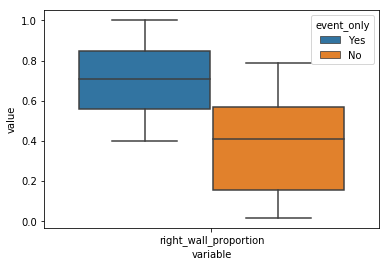

In [47]:
print(significance_test_proportions_frame(proportions_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportions_frame, id_vars=['event_only']))

## Fireballs

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2475.5, pvalue=0.00039559753785814976)
MannwhitneyuResult(statistic=2615.0, pvalue=1.9104690646102346e-05)


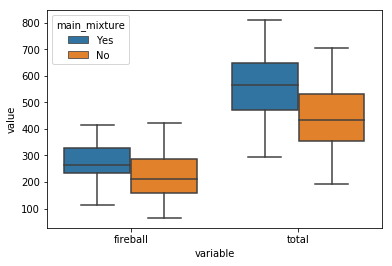

In [49]:
fireball_data, proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "fireball", main_mixture_summary, summary_num_events_dataframe)
significance_test(fireball_data, "fireball")
#Fireball more common in main mixture, but this mixture is so dominating
#that this is to be expected.
pd.melt(right_walls_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(fireball_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=1768.0, pvalue=0.8686818987976536)
None


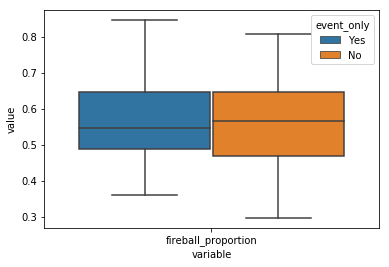

In [50]:
print(significance_test_proportions_frame(proportions_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportions_frame, id_vars=['event_only']))